<h2>Importing Libraries</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from datetime import date

<h2>Folder Information</h2>

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is CC80-9388

 Directory of C:\Users\ashis\Documents\compete\hackerearth_IIT_Madras

02-08-2019  23:45    <DIR>          .
02-08-2019  23:45    <DIR>          ..
29-07-2019  11:39    <DIR>          .ipynb_checkpoints
29-07-2019  11:36    <DIR>          DataSets
30-07-2019  01:10           233,812 model.ckpt
02-08-2019  21:10           129,457 model1.ckpt
02-08-2019  23:45         3,392,397 notebook1.0.ipynb
02-08-2019  23:43           549,278 output.csv
               4 File(s)      4,304,944 bytes
               4 Dir(s)  874,276,343,808 bytes free


In [3]:
!ls './DataSets'

Test.csv
Train.csv
sample_submission.csv


<h2>Importing data</h2>

In [4]:
train_original=pd.read_csv('./DataSets/train.csv')
train=pd.read_csv('./DataSets/train.csv')

In [5]:
test_original=pd.read_csv('./DataSets/test.csv')
test=pd.read_csv('./DataSets/test.csv')

In [6]:
sample=pd.read_csv('./DataSets/sample_submission.csv')

<h2>Preprocessing</h2>

In [7]:
train.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [8]:
test.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
0,2017-05-18 00:00:00,None,73,63,1,27,4,4,285.15,0.0,0,90,Rain,moderate rain
1,2017-05-18 00:00:00,None,251,63,1,27,4,4,285.15,0.0,0,90,Mist,mist
2,2017-05-18 00:00:00,None,75,56,1,0,1,1,285.15,0.0,0,90,Drizzle,light intensity drizzle
3,2017-05-18 01:00:00,None,98,56,1,351,2,2,284.79,0.0,0,90,Rain,heavy intensity rain
4,2017-05-18 01:00:00,None,283,56,1,351,1,1,284.79,0.0,0,90,Mist,mist


In [9]:
sample

,date_time,traffic_volume
0,1969-05-17 21:00:00,500
1,1969-05-17 21:00:00,530
2,1969-05-17 21:00:00,545
3,1969-05-17 22:00:00,750


In [10]:
print('length of train = %d, length of test = %d'%(len(train),len(test)))

length of train = 33750, length of test = 14454


In [11]:
train.columns

Index(['date_time', 'is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point',
       'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type',
       'weather_description', 'traffic_volume'],
      dtype='object')

In [12]:
L1,L2=[],[]
for i in train.date_time:
    t1,t2=i.split(' ')
    L1.append(t1)
    L2.append(t2)
train['date']=L1
train['time']=L2

In [13]:
train.head(55)

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,date,time
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012-10-02,09:00:00
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012-10-02,10:00:00
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012-10-02,11:00:00
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012-10-02,12:00:00
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012-10-02,13:00:00
5,2012-10-02 14:00:00,None,23,65,3,328,6,6,291.72,0.0,0.0,1,Clear,sky is clear,5181,2012-10-02,14:00:00
6,2012-10-02 15:00:00,None,184,64,3,328,7,7,293.17,0.0,0.0,1,Clear,sky is clear,5584,2012-10-02,15:00:00
7,2012-10-02 16:00:00,None,167,64,3,327,7,7,293.86,0.0,0.0,1,Clear,sky is clear,6015,2012-10-02,16:00:00
8,2012-10-02 17:00:00,None,119,63,3,327,6,6,294.14,0.0,0.0,20,Clouds,few clouds,5791,2012-10-02,17:00:00
9,2012-10-02 18:00:00,None,161,63,3,326,3,3,293.10,0.0,0.0,20,Clouds,few clouds,4770,2012-10-02,18:00:00


In [14]:
L1,L2,L3=[],[],[]
for i in train.date:
    t1,t2,t3=i.split('-')
    L1.append(t1)
    L2.append(t2)
    L3.append(t3)
train['DD']=L3
train['MM']=L2
train['YY']=L1

In [15]:
train

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,date,time,DD,MM,YY
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012-10-02,09:00:00,02,10,2012
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012-10-02,10:00:00,02,10,2012
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012-10-02,11:00:00,02,10,2012
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012-10-02,12:00:00,02,10,2012
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012-10-02,13:00:00,02,10,2012
5,2012-10-02 14:00:00,None,23,65,3,328,6,6,291.72,0.0,0.0,1,Clear,sky is clear,5181,2012-10-02,14:00:00,02,10,2012
6,2012-10-02 15:00:00,None,184,64,3,328,7,7,293.17,0.0,0.0,1,Clear,sky is clear,5584,2012-10-02,15:00:00,02,10,2012
7,2012-10-02 16:00:00,None,167,64,3,327,7,7,293.86,0.0,0.0,1,Clear,sky is clear,6015,2012-10-02,16:00:00,02,10,2012
8,2012-10-02 17:00:00,None,119,63,3,327,6,6,294.14,0.0,0.0,20,Clouds,few clouds,5791,2012-10-02,17:00:00,02,10,2012
9,2012-10-02 18:00:00,None,161,63,3,326,3,3,293.10,0.0,0.0,20,Clouds,few clouds,4770,2012-10-02,18:00:00,02,10,2012


In [16]:
min(train.MM)

'01'

In [17]:
a=date(int(min(train.YY)),int(min(train.MM)),int(min(train.DD))+10)
print(a.weekday())
a.strftime("%A")

2


'Wednesday'

In [18]:
train.groupby(train.date).count()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,date,time,DD,MM,YY
date,,,,,,,,,,,,,,,,,,,,
2012-10-02,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
2012-10-03,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
2012-10-04,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
2012-10-05,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
2012-10-06,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
2012-10-07,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
2012-10-08,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
2012-10-09,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
2012-10-10,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24


In [19]:
train[train.date=='2012-10-20']

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,date,time,DD,MM,YY
437,2012-10-20 00:00:00,None,246,81,0,0,7,7,280.06,0.0,0.0,92,Rain,light rain,1270,2012-10-20,00:00:00,20,10,2012
438,2012-10-20 00:00:00,None,148,75,0,0,1,1,280.06,0.0,0.0,92,Rain,moderate rain,1270,2012-10-20,00:00:00,20,10,2012
439,2012-10-20 01:00:00,None,273,70,0,0,9,9,280.28,0.0,0.0,96,Drizzle,drizzle,773,2012-10-20,01:00:00,20,10,2012
440,2012-10-20 01:00:00,None,163,70,0,0,1,1,280.28,0.0,0.0,96,Rain,light rain,773,2012-10-20,01:00:00,20,10,2012
441,2012-10-20 02:00:00,None,141,76,0,0,6,6,280.38,0.0,0.0,96,Drizzle,light intensity drizzle,589,2012-10-20,02:00:00,20,10,2012
442,2012-10-20 03:00:00,None,235,70,0,0,4,4,280.62,0.0,0.0,96,Drizzle,light intensity drizzle,432,2012-10-20,03:00:00,20,10,2012
443,2012-10-20 03:00:00,None,101,70,0,0,7,7,280.62,0.0,0.0,96,Mist,mist,432,2012-10-20,03:00:00,20,10,2012
444,2012-10-20 04:00:00,None,127,70,0,0,3,3,280.91,0.0,0.0,96,Mist,mist,401,2012-10-20,04:00:00,20,10,2012
445,2012-10-20 04:00:00,None,135,76,0,0,9,9,280.91,0.0,0.0,96,Drizzle,drizzle,401,2012-10-20,04:00:00,20,10,2012
446,2012-10-20 04:00:00,None,236,76,0,0,8,8,280.91,0.0,0.0,96,Rain,light rain,401,2012-10-20,04:00:00,20,10,2012


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 20 columns):
date_time              33750 non-null object
is_holiday             33750 non-null object
air_pollution_index    33750 non-null int64
humidity               33750 non-null int64
wind_speed             33750 non-null int64
wind_direction         33750 non-null int64
visibility_in_miles    33750 non-null int64
dew_point              33750 non-null int64
temperature            33750 non-null float64
rain_p_h               33750 non-null float64
snow_p_h               33750 non-null float64
clouds_all             33750 non-null int64
weather_type           33750 non-null object
weather_description    33750 non-null object
traffic_volume         33750 non-null int64
date                   33750 non-null object
time                   33750 non-null object
DD                     33750 non-null object
MM                     33750 non-null object
YY                     33750 non-null obj

In [21]:
L1=[]
L2=[]
for i in range(len(train)):
    t1=date(int(train.iloc[i].YY),int(train.iloc[i].MM),int(train.iloc[i].DD))
    L1.append(t1.weekday())
    L2.append(t1.strftime("%A"))
print(L1,L2)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 

In [22]:
train['day']=L2
train['day_code']=L1

In [23]:
train.describe()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume,day_code
count,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,154.841422,71.209007,3.378193,199.471852,4.989748,4.989748,280.069587,0.448739,0.000318,50.458785,3240.118163,2.982667
std,83.735515,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,53.526500,0.009760,38.871734,1991.487289,2.005717
min,10.000000,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,83.000000,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,0.000000,0.000000,1.000000,1165.250000,1.000000
50%,155.000000,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,64.000000,3335.000000,3.000000
75%,228.000000,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,90.000000,4926.000000,5.000000
max,299.000000,100.000000,16.000000,360.000000,9.000000,9.000000,308.240000,9831.300000,0.510000,100.000000,7280.000000,6.000000


In [24]:
train[train.temperature==0]

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,...,weather_type,weather_description,traffic_volume,date,time,DD,MM,YY,day,day_code
11898,2014-01-31 03:00:00,None,26,78,2,320,1,1,0.0,0.0,...,Clear,sky is clear,361,2014-01-31,03:00:00,31,01,2014,Friday,4
11899,2014-01-31 04:00:00,None,18,77,3,310,1,1,0.0,0.0,...,Clear,sky is clear,734,2014-01-31,04:00:00,31,01,2014,Friday,4
11900,2014-01-31 05:00:00,None,189,84,3,310,1,1,0.0,0.0,...,Clear,sky is clear,2557,2014-01-31,05:00:00,31,01,2014,Friday,4
11901,2014-01-31 06:00:00,None,12,84,4,320,1,1,0.0,0.0,...,Clear,sky is clear,5150,2014-01-31,06:00:00,31,01,2014,Friday,4
11946,2014-02-02 03:00:00,None,250,70,0,0,1,1,0.0,0.0,...,Clear,sky is clear,291,2014-02-02,03:00:00,02,02,2014,Sunday,6
11947,2014-02-02 04:00:00,None,154,76,0,0,3,3,0.0,0.0,...,Clear,sky is clear,284,2014-02-02,04:00:00,02,02,2014,Sunday,6
11948,2014-02-02 05:00:00,None,151,83,2,220,2,2,0.0,0.0,...,Clear,sky is clear,434,2014-02-02,05:00:00,02,02,2014,Sunday,6
11949,2014-02-02 06:00:00,None,174,83,0,0,2,2,0.0,0.0,...,Clear,sky is clear,739,2014-02-02,06:00:00,02,02,2014,Sunday,6
11950,2014-02-02 07:00:00,None,143,83,1,210,9,9,0.0,0.0,...,Clear,sky is clear,962,2014-02-02,07:00:00,02,02,2014,Sunday,6
11951,2014-02-02 08:00:00,None,187,83,0,0,6,6,0.0,0.0,...,Clear,sky is clear,1670,2014-02-02,08:00:00,02,02,2014,Sunday,6


In [25]:
L1=[]
for i in range(len(train)):
    if train.iloc[i].temperature==0:
        j=i-1
        while train.iloc[j].temperature==0:
            j-=1
        L1.append(train.iloc[j].temperature)
    else:
        L1.append(train.iloc[i].temperature)
train.temperature=L1

In [26]:
train.iloc[11898]

date_time              2014-01-31 03:00:00
is_holiday                            None
air_pollution_index                     26
humidity                                78
wind_speed                               2
wind_direction                         320
visibility_in_miles                      1
dew_point                                1
temperature                         255.93
rain_p_h                                 0
snow_p_h                                 0
clouds_all                               0
weather_type                         Clear
weather_description           sky is clear
traffic_volume                         361
date                            2014-01-31
time                              03:00:00
DD                                      31
MM                                      01
YY                                    2014
day                                 Friday
day_code                                 4
Name: 11898, dtype: object

In [27]:
train[train.rain_p_h>3000]

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,...,weather_type,weather_description,traffic_volume,date,time,DD,MM,YY,day,day_code
24872,2016-07-11 17:00:00,None,163,33,4,240,1,1,302.11,9831.3,...,Rain,very heavy rain,5535,2016-07-11,17:00:00,11,07,2016,Monday,0


<h2>Visualization</h2>

In [28]:
train.columns

Index(['date_time', 'is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point',
       'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type',
       'weather_description', 'traffic_volume', 'date', 'time', 'DD', 'MM',
       'YY', 'day', 'day_code'],
      dtype='object')

In [29]:
train[train.is_holiday!='None'].is_holiday.unique()

array(['Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

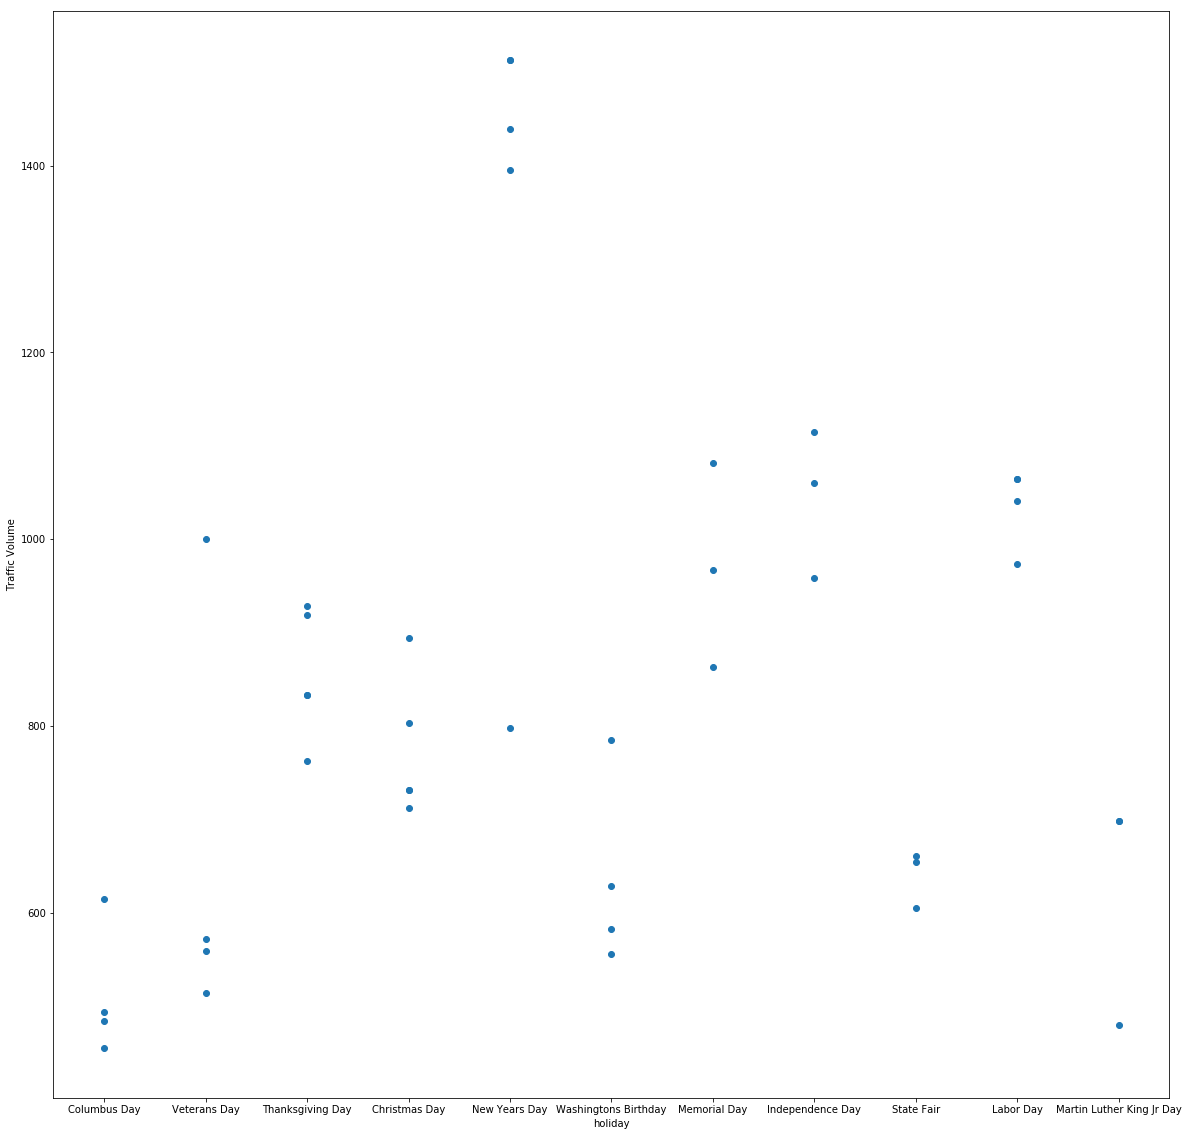

In [30]:
plt.figure(figsize=(20,20))
plt.xlabel('holiday')
plt.ylabel('Traffic Volume')
plt.scatter(train[train.is_holiday!='None'].is_holiday,train[train.is_holiday!='None'].traffic_volume)

In [31]:
?plt.boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x2bdf369ca20>,
 'caps': [<matplotlib.lines.Line2D at 0x2bdf36bf320>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bdf369c8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2bdf36bfb70>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bdf36bff98>],
 'means': []}

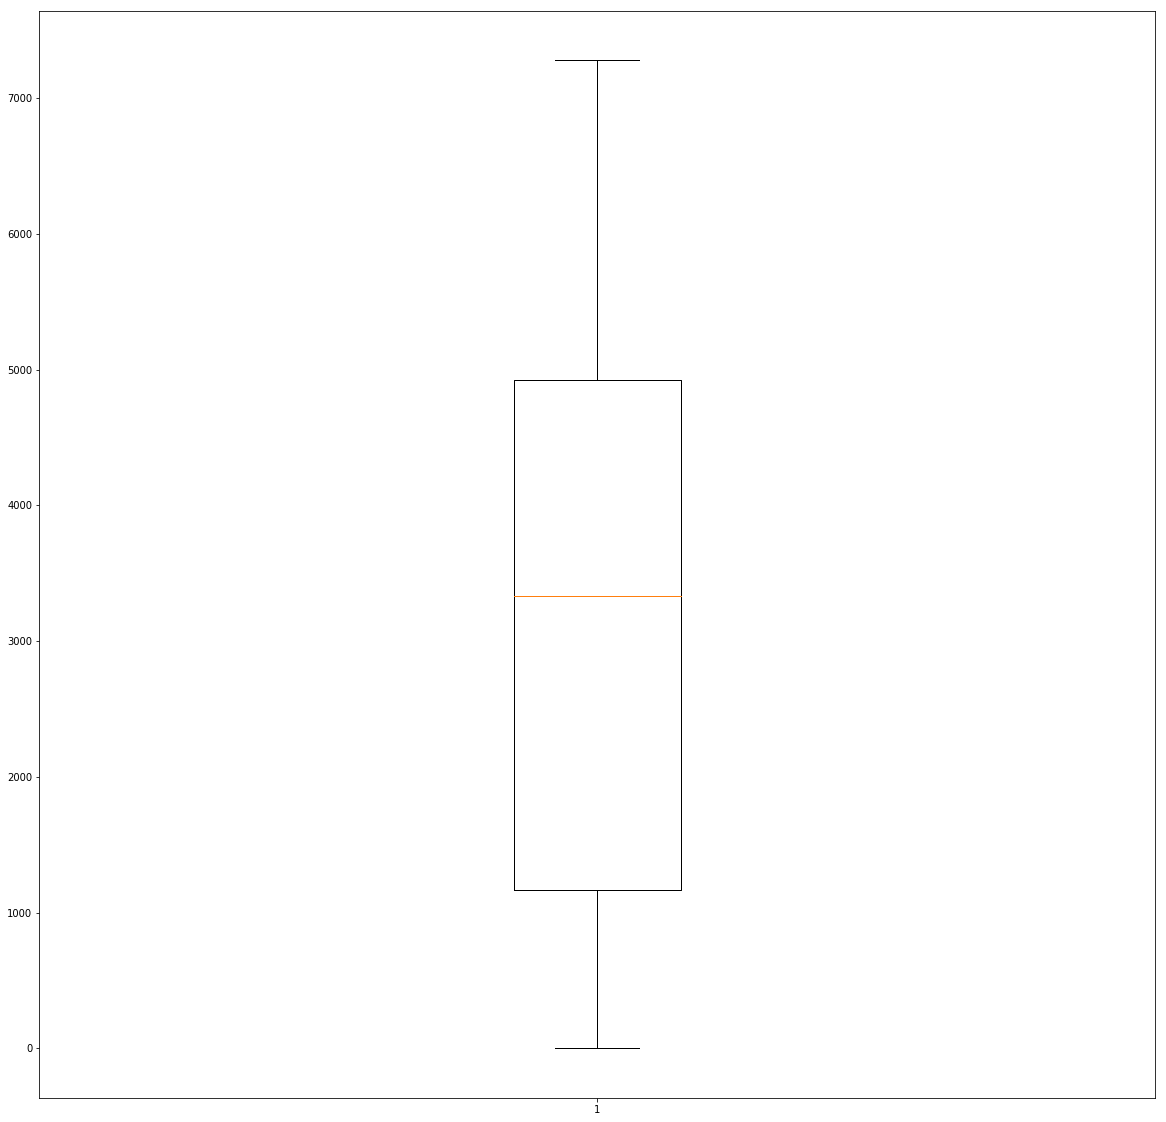

In [32]:
plt.figure(figsize=(20,20))
#plt.xlabel('holiday')
#plt.ylabel('Traffic Volume')
plt.boxplot(train.traffic_volume)

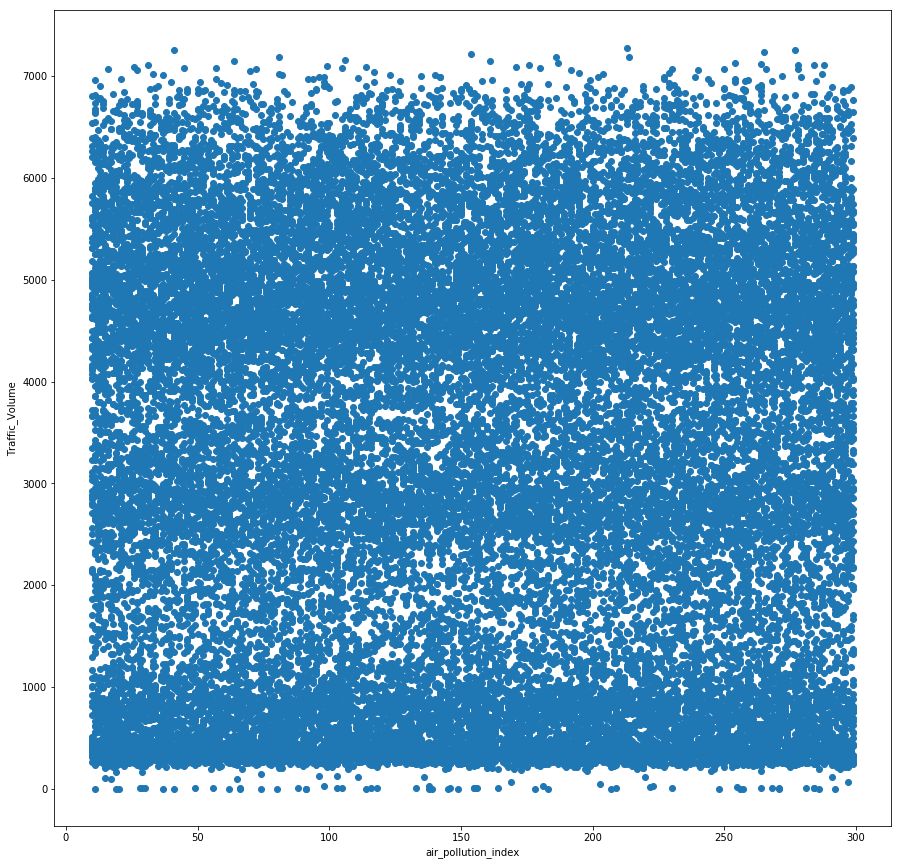

In [33]:
plt.figure(figsize=(15,15))
plt.xlabel('air_pollution_index')
plt.ylabel('Traffic_Volume')
plt.scatter(train.air_pollution_index,train.traffic_volume)

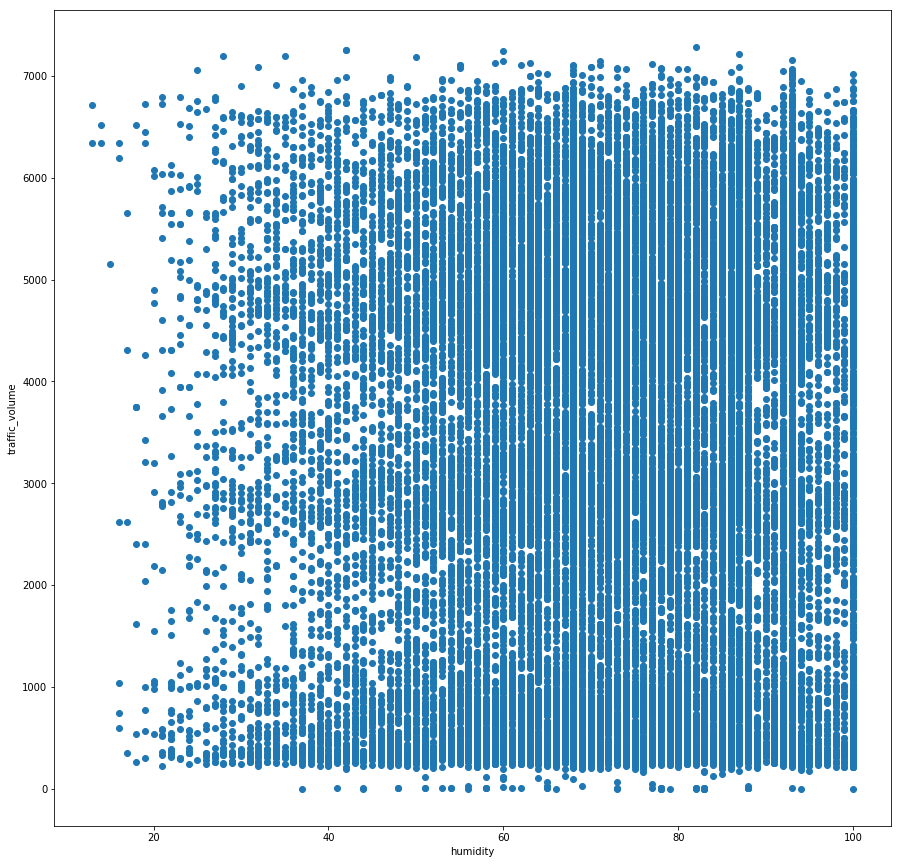

In [34]:
plt.figure(figsize=(15,15))
plt.xlabel('humidity')
plt.ylabel('traffic_volume')
plt.scatter(train.humidity,train.traffic_volume)

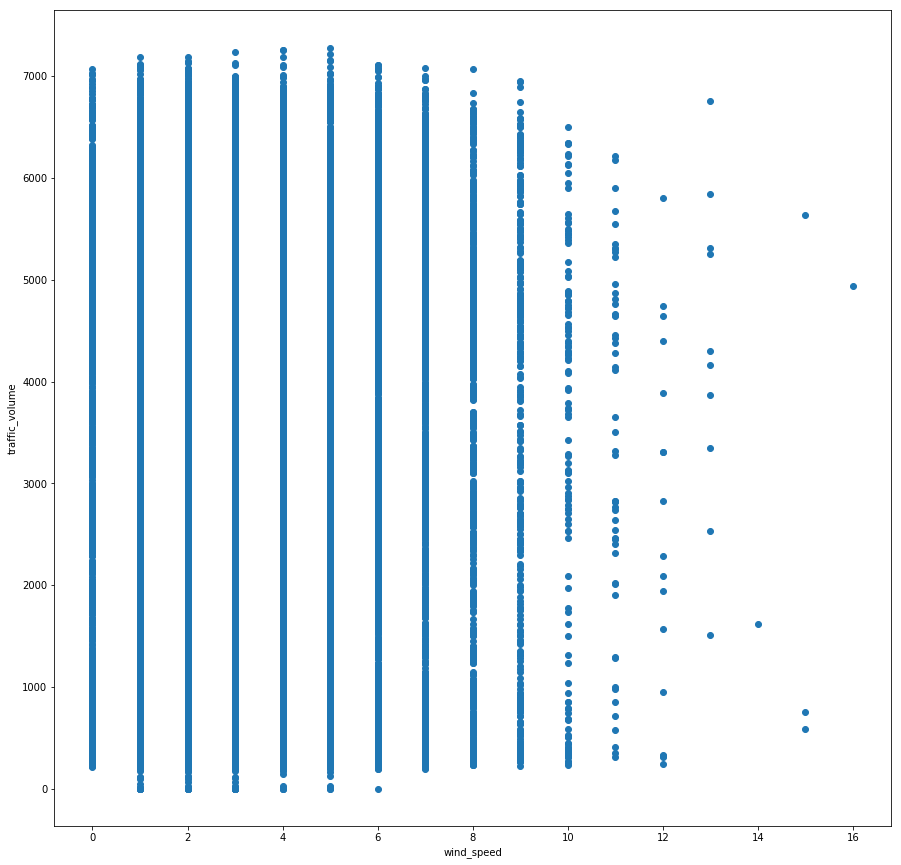

In [35]:
plt.figure(figsize=(15,15))
plt.xlabel('wind_speed')
plt.ylabel('traffic_volume')
plt.scatter(train.wind_speed,train.traffic_volume)

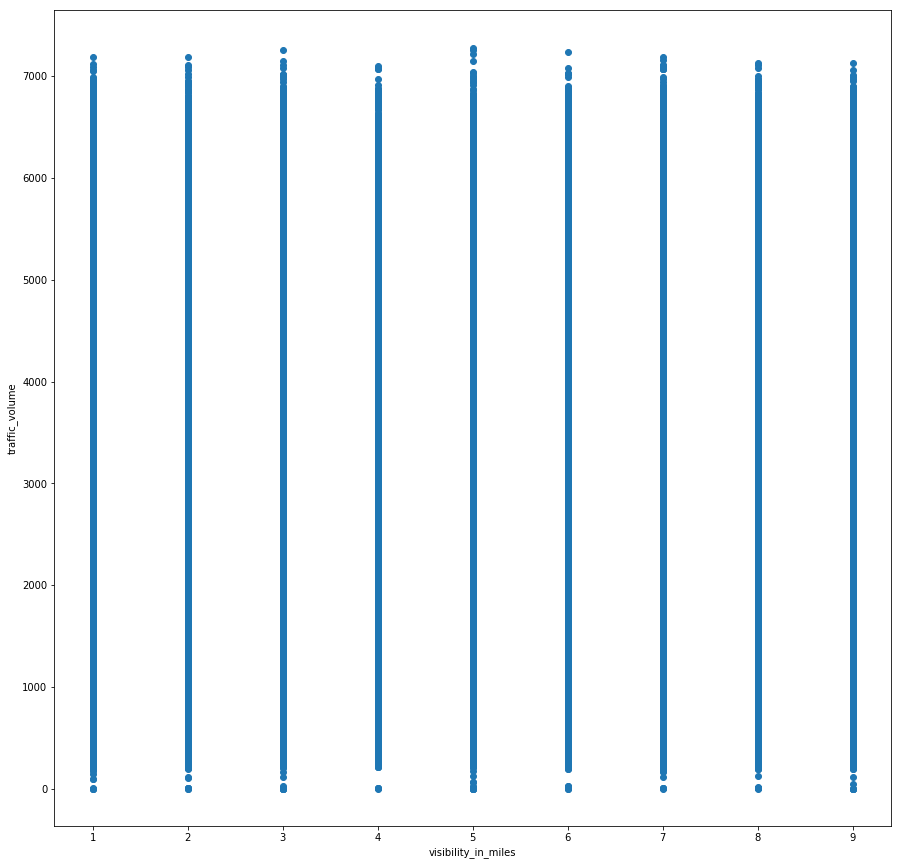

In [36]:
plt.figure(figsize=(15,15))
plt.xlabel('visibility_in_miles')
plt.ylabel('traffic_volume')
plt.scatter(train.visibility_in_miles,train.traffic_volume)

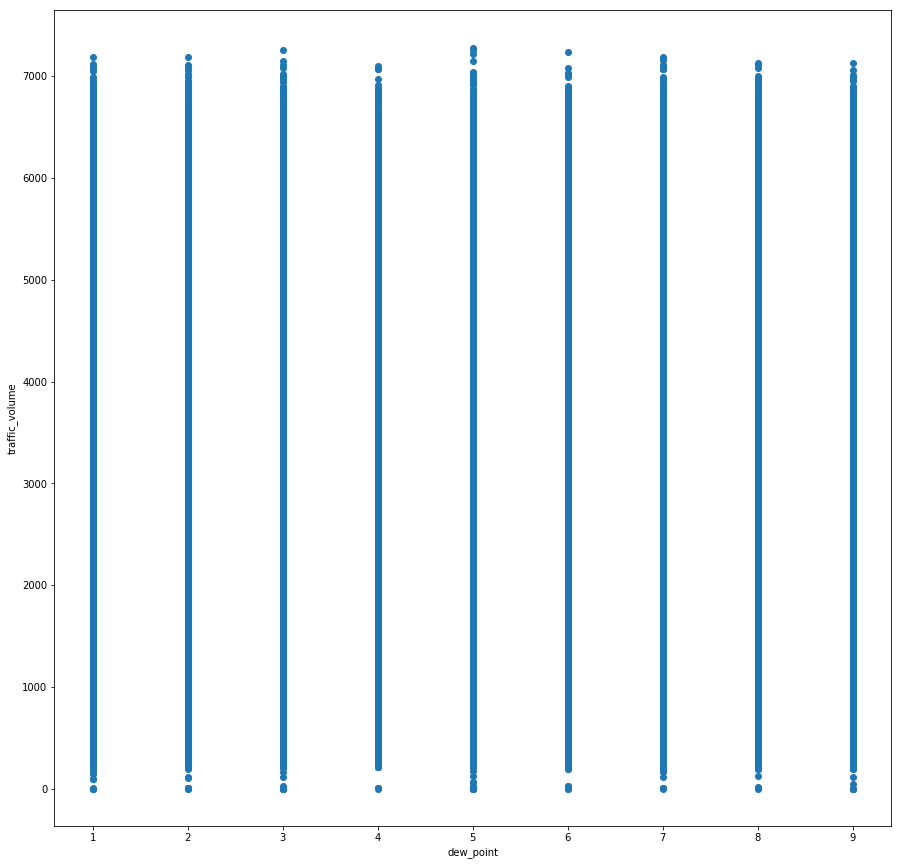

In [37]:
plt.figure(figsize=(15,15))
plt.xlabel('dew_point')
plt.ylabel('traffic_volume')
plt.scatter(train.dew_point,train.traffic_volume)

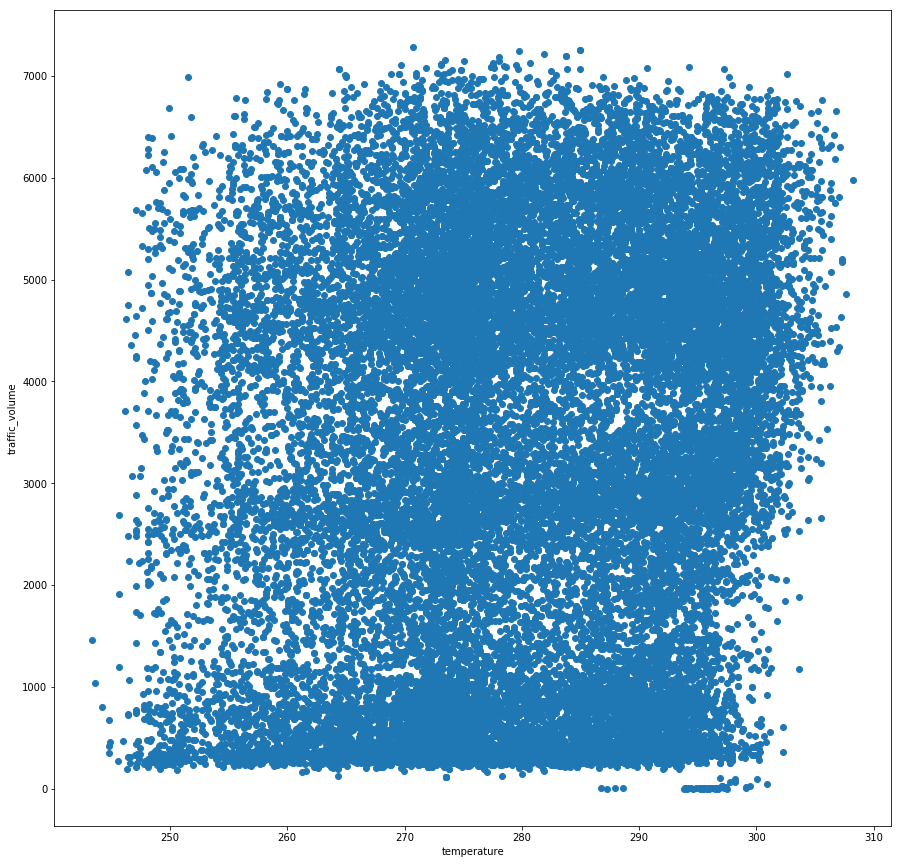

In [38]:
plt.figure(figsize=(15,15))
plt.xlabel('temperature')
plt.ylabel('traffic_volume')
plt.scatter(train.temperature,train.traffic_volume)

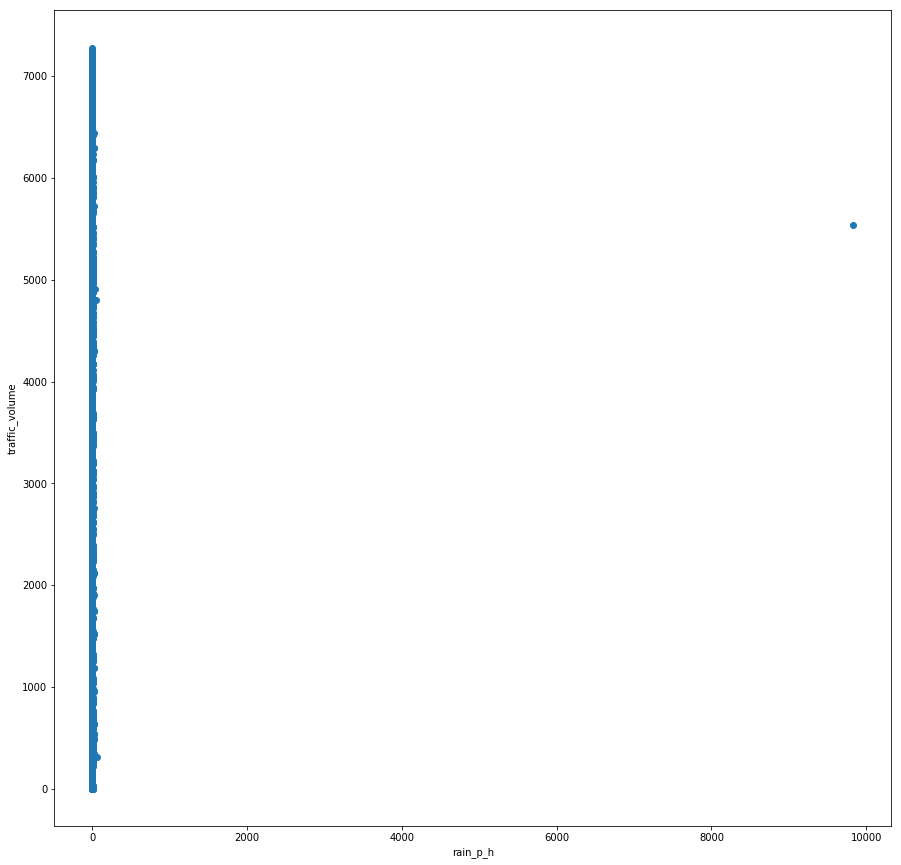

In [39]:
plt.figure(figsize=(15,15))
plt.xlabel('rain_p_h')
plt.ylabel('traffic_volume')
plt.scatter(train.rain_p_h,train.traffic_volume)

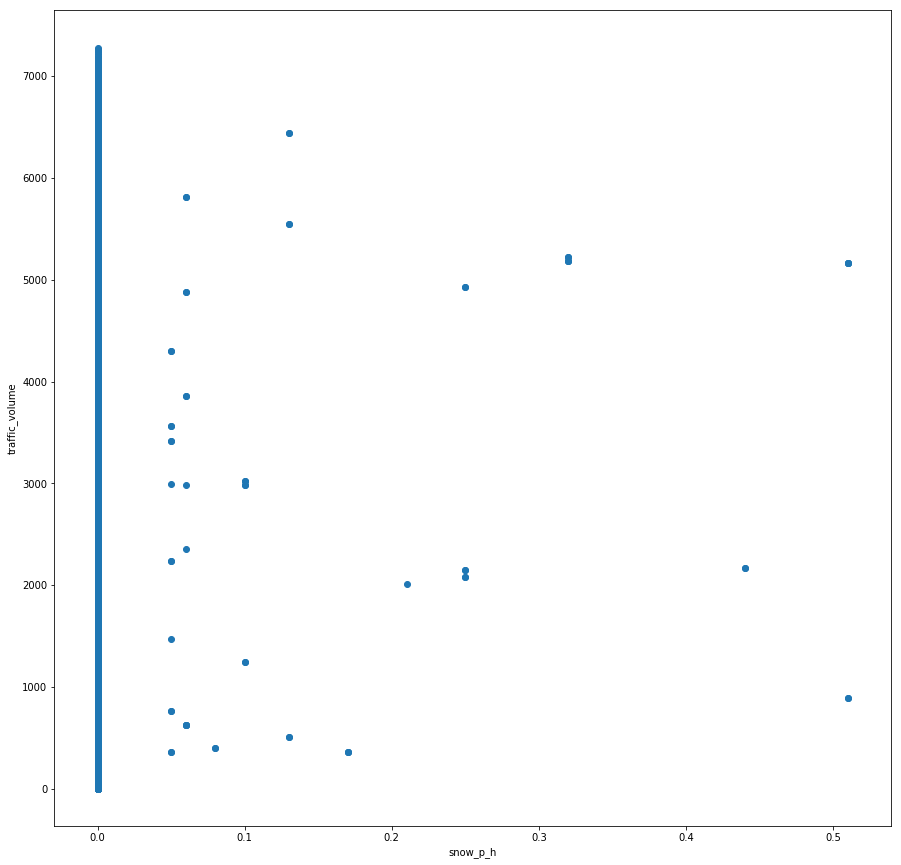

In [40]:
plt.figure(figsize=(15,15))
plt.xlabel('snow_p_h')
plt.ylabel('traffic_volume')
plt.scatter(train.snow_p_h,train.traffic_volume)

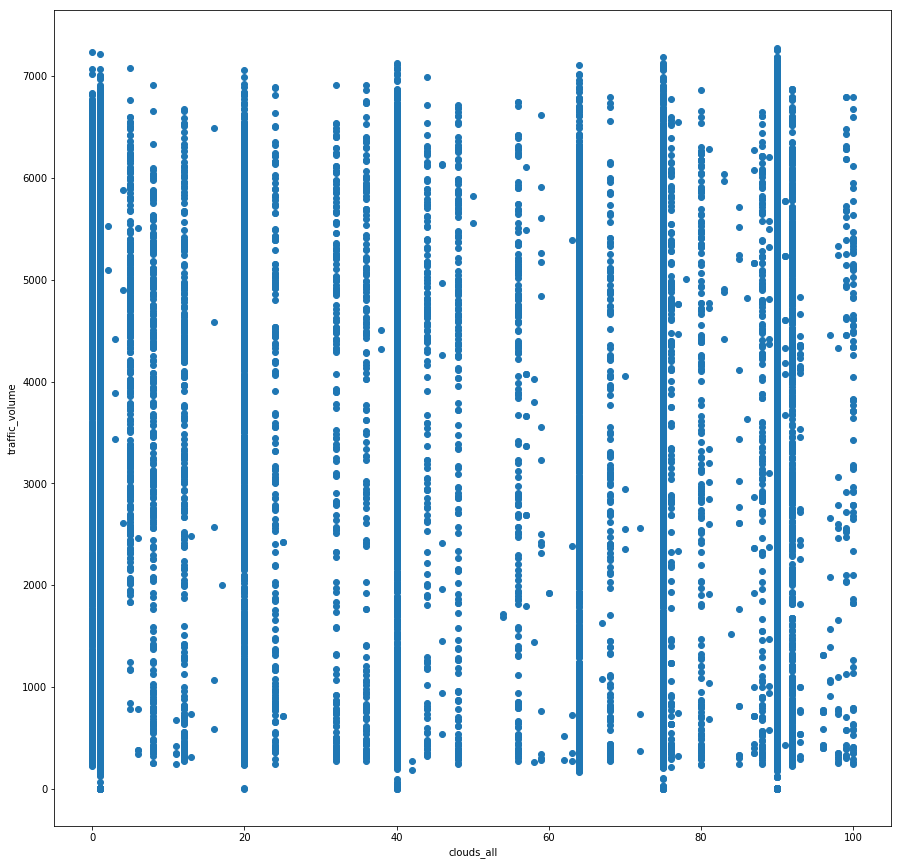

In [41]:
plt.figure(figsize=(15,15))
plt.xlabel('clouds_all')
plt.ylabel('traffic_volume')
plt.scatter(train.clouds_all,train.traffic_volume)

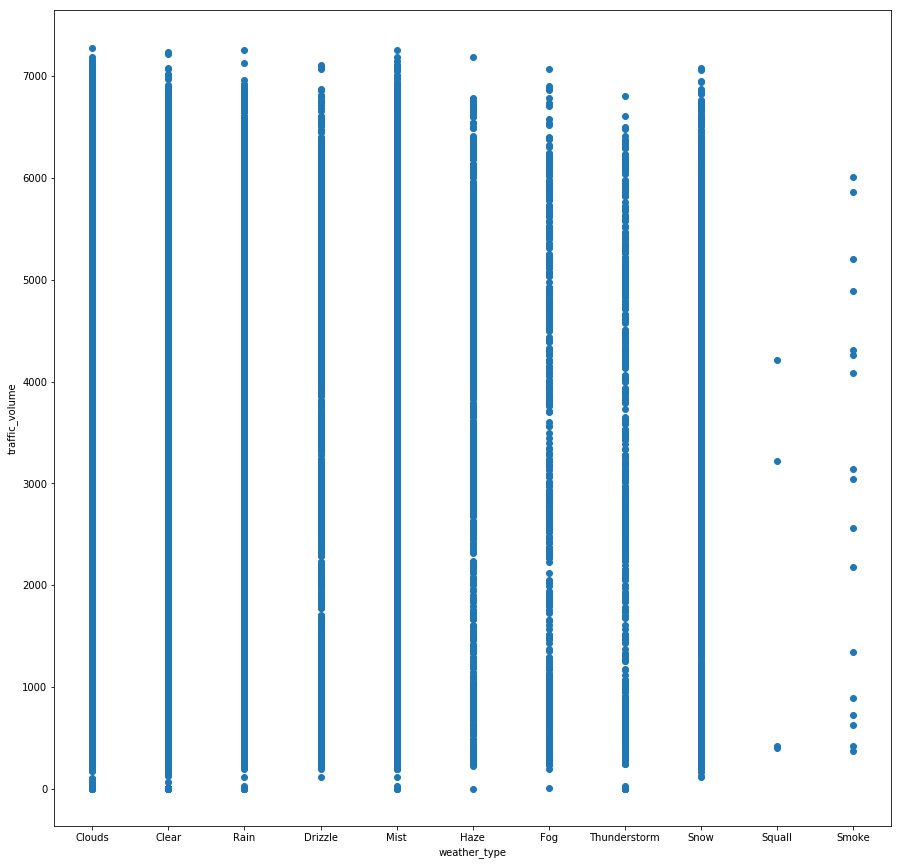

In [42]:
plt.figure(figsize=(15,15))
plt.xlabel('weather_type')
plt.ylabel('traffic_volume')
plt.scatter(train.weather_type,train.traffic_volume)

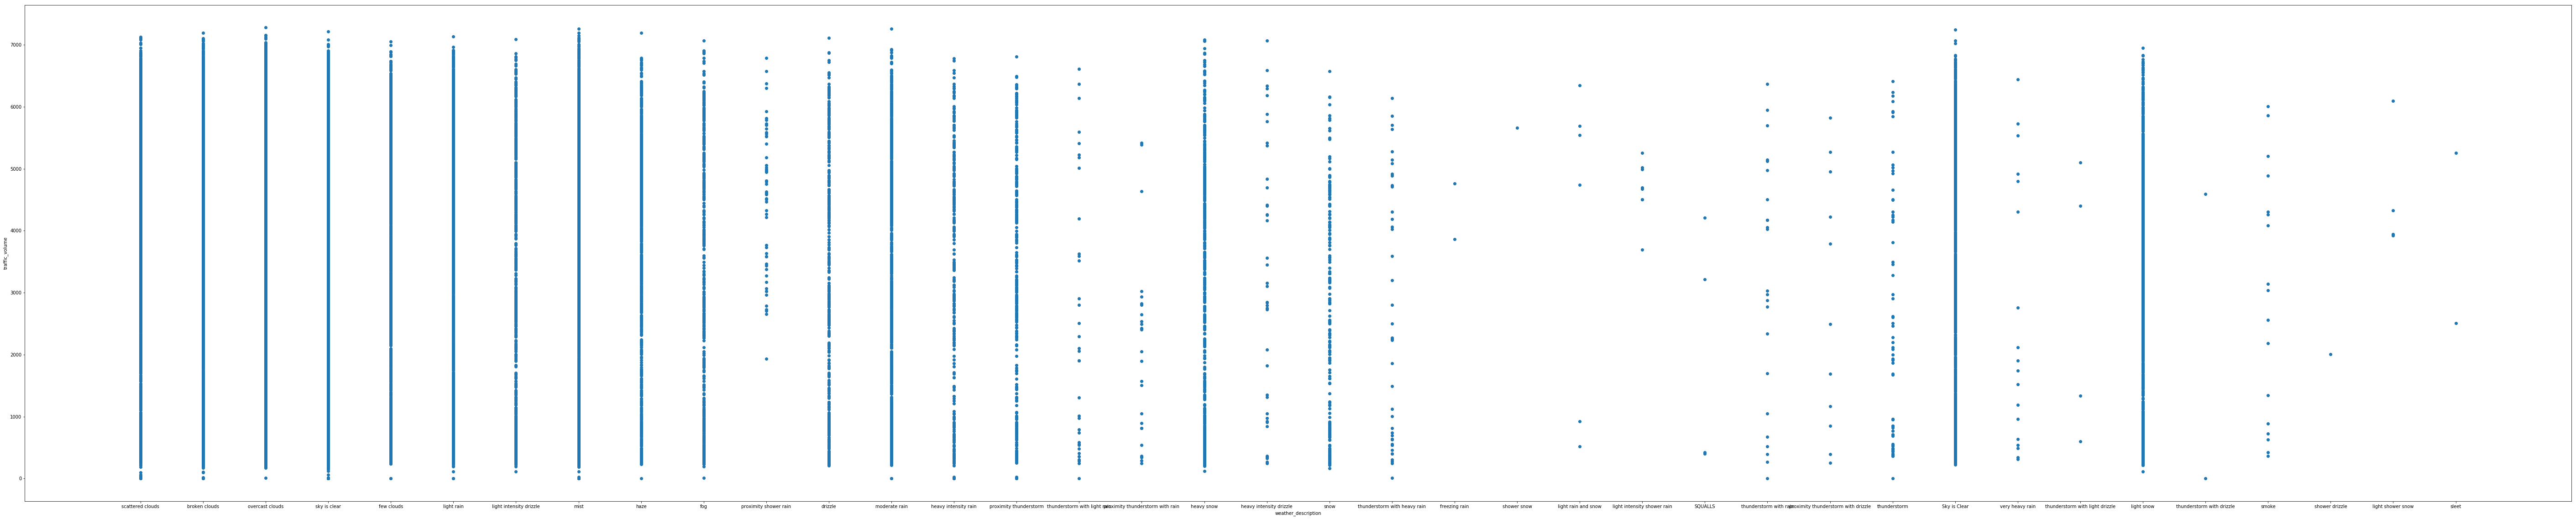

In [43]:
plt.figure(figsize=(100,20))
plt.xlabel('weather_description')
plt.ylabel('traffic_volume')
plt.scatter(train.weather_description,train.traffic_volume)

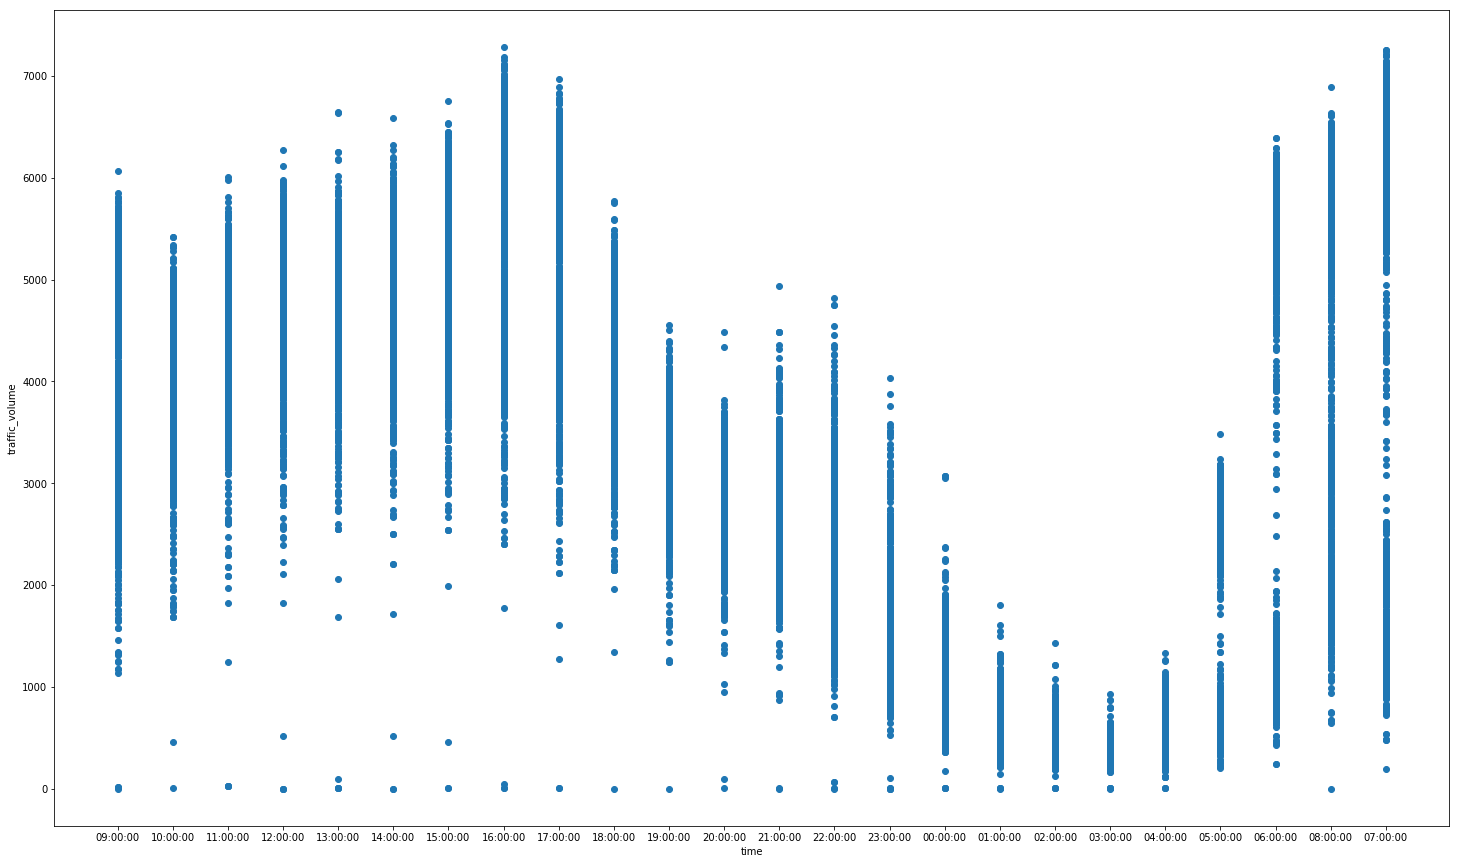

In [44]:
plt.figure(figsize=(25,15))
plt.xlabel('time')
plt.ylabel('traffic_volume')
plt.scatter(train.time,train.traffic_volume)

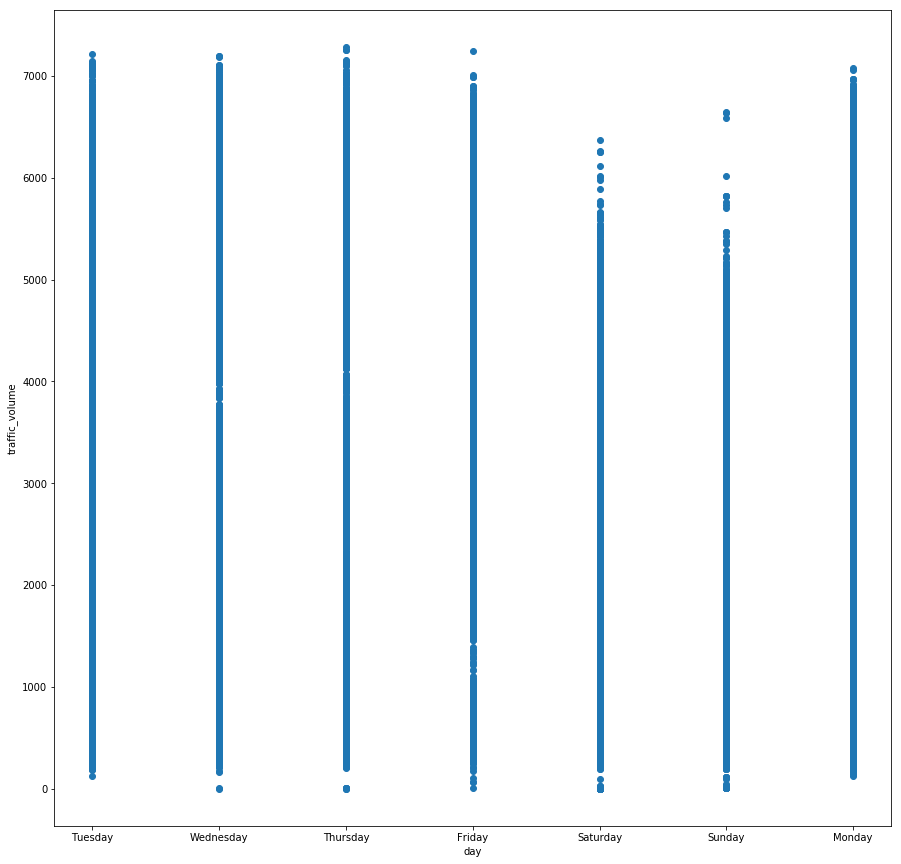

In [45]:
plt.figure(figsize=(15,15))
plt.xlabel('day')
plt.ylabel('traffic_volume')
plt.scatter(train.day,train.traffic_volume)

<h2>Preproccessing</h2>

In [304]:
train.columns

Index(['date_time', 'is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point',
       'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type',
       'weather_description', 'traffic_volume', 'date', 'time', 'DD', 'MM',
       'YY', 'day', 'day_code', 'is_holiday_code', 'air_pollution_index_code',
       'humidity_code', 'wind_speed_code', 'wind_direction_code',
       'visibility_in_miles_code', 'dew_point_code', 'temperature_code',
       'rain_ph_code', 'snow_p_h_code', 'clouds_all_code', 'weather_type_code',
       'weather_description_code', 'time_code'],
      dtype='object')

In [144]:
len(train.columns)

22

In [145]:
train.is_holiday.unique()

array(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [146]:
?preprocessing.StandardScaler()

In [147]:
scaler=preprocessing.StandardScaler()

In [42]:
?pd.factorize

In [218]:
labels,uniques=pd.factorize(train.is_holiday)

In [149]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [150]:
uniques

Index(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'],
      dtype='object')

In [151]:
train['is_holiday_code']=labels

In [152]:
train['air_pollution_index_code']=train.air_pollution_index
#(train.air_pollution_index-train.air_pollution_index.mean())/train.air_pollution_index.std()

In [153]:
train['humidity_code']=train.humidity
#(train.humidity-train.humidity.mean())/train.humidity.std()

In [154]:
train['wind_speed_code']=train.wind_speed
#(train.wind_speed-train.wind_speed.mean())/train.wind_speed.std()

In [155]:
train['wind_direction_code']=train.wind_direction
#(train.wind_direction-train.wind_direction.mean())/train.wind_direction.std()

In [156]:
train['visibility_in_miles_code']=train.visibility_in_miles
#(train.visibility_in_miles-train.visibility_in_miles.mean())/train.visibility_in_miles.std()

In [157]:
train['dew_point_code']=train.dew_point
#(train.dew_point-train.dew_point.mean())/train.dew_point.std()

In [158]:
train['temperature_code']=train.temperature
#(train.temperature-train.temperature.mean())/train.temperature.std()

In [159]:
train['rain_ph_code']=train.rain_p_h
#(train.rain_p_h-train.rain_p_h.mean())/train.rain_p_h.std()

In [160]:
train['snow_p_h_code']=train.snow_p_h
#(train.snow_p_h-train.snow_p_h.mean())/train.snow_p_h.std()

In [161]:
train['clouds_all_code']=train.clouds_all
#(train.clouds_all-train.clouds_all.mean())/train.clouds_all.std()

In [244]:
labels1,uniques1=pd.factorize(train.weather_type)

In [163]:
uniques1

Index(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'],
      dtype='object')

In [164]:
train['weather_type_code']=labels1

In [259]:
labels2,uniques2=pd.factorize(train.weather_description)

In [166]:
uniques2

Index(['scattered clouds', 'broken clouds', 'overcast clouds', 'sky is clear',
       'few clouds', 'light rain', 'light intensity drizzle', 'mist', 'haze',
       'fog', 'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'],
      dtype='object')

In [167]:
train['weather_description_code']=labels2

In [168]:
L=[]
for i in train.time:
    L.append(int(i.split(':')[0]))    
L=np.array(L)

In [169]:
train['time_code']=L

In [170]:
train.time_code[::]

0         9
1        10
2        11
3        12
4        13
5        14
6        15
7        16
8        17
9        18
10       19
11       20
12       21
13       22
14       23
15        0
16        1
17        2
18        3
19        4
20        5
21        6
22        8
23        9
24       12
25       13
26       14
27       15
28       16
29       18
         ..
33720    10
33721    10
33722    11
33723    12
33724    12
33725    13
33726    13
33727    14
33728    15
33729    16
33730    16
33731    17
33732    17
33733    18
33734    18
33735    18
33736    18
33737    19
33738    19
33739    19
33740    20
33741    20
33742    20
33743    21
33744    21
33745    21
33746    22
33747    22
33748    23
33749    23
Name: time_code, Length: 33750, dtype: int32

<h2>Training (Neural Network)</h2>

In [182]:
np.sqrt((np.array([14])-np.array([12]))**2).mean()

2.0

In [189]:
train[train.columns[21::]].head()

,day_code,is_holiday_code,air_pollution_index_code,humidity_code,wind_speed_code,wind_direction_code,visibility_in_miles_code,dew_point_code,temperature_code,rain_ph_code,snow_p_h_code,clouds_all_code,weather_type_code,weather_description_code,time_code
0,1,0,121,89,2,329,1,1,288.28,0.0,0.0,40,0,0,9
1,1,0,178,67,3,330,1,1,289.36,0.0,0.0,75,0,1,10
2,1,0,113,66,3,329,2,2,289.58,0.0,0.0,90,0,2,11
3,1,0,20,66,3,329,5,5,290.13,0.0,0.0,90,0,2,12
4,1,0,281,65,3,329,7,7,291.14,0.0,0.0,75,0,1,13


In [ ]:
# MNIST contains handwritten digit and
# is trained to recognize the handwritten digits

# Importing libraries
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
#import torchvision
#import torchvision.transforms as transforms
#from PIL import Image
#import numpy as np

# Device configuration
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu') # used to run on GPU

#Hyper parameters
input_size=15 # image size (total 784 pixels)
hidden_size=100 # hidden layer 1
hidden_size_2=100 # hidden layer 2
hidden_size_3=100
hidden_size_4=100
num_classes=1 # output layer (for digits 0 ot 9)
num_epochs=200 #Number of epochs is the number of times the whole
             # training data is shown to the network while training
batch_size=100
learning_rate=0.1

# Dataset
x=np.array(train[train.columns[21::]])
y=np.array(train.traffic_volume)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25)


# Fully connected neural network with two hidden layer
class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size,hidden_size_2,num_classes):
        super(NeuralNet, self).__init__()
        self.fc1=nn.Linear(input_size,hidden_size) # for passing from layer of bipartite graph of 784 elements into part of 500 elements
        self.relu=nn.Sigmoid() # to perform relu function on first layer (784)
        self.fc2=nn.Linear(hidden_size,hidden_size_2) # convert 500 elements into 100 elements (next layer size)
        self.fc3=nn.Linear(hidden_size_2,hidden_size_3) # convert 500 elements into 10 elements (digits 0 to 9)
        self.fc4=nn.Linear(hidden_size_3,hidden_size_4)
        self.fc5=nn.Linear(hidden_size_4,num_classes)
    def forward(self,x): # Forward propogation
        out=self.fc1(x) # feeding image tensor into first layer
        out=self.relu(out) # converting first layer input into relu function
        out=self.fc2(out) # propogating hidden layer to 2nd hidden layer (100)
        out=self.relu(out)
        out=self.fc3(out) # propogating 2nd hidden layer to ouptput layer (10)
        out=self.relu(out)
        out=self.fc4(out)
        out=self.relu(out)
        out=self.fc5(out)
        return out

model=NeuralNet(input_size,hidden_size,hidden_size_2,num_classes).to(device)

# Loss and optimizer

def criterion(outp,exp):
    #print(outp,exp)
    mse=((outp-exp)**2).mean()
    return mse
# optimizing the learning rate
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

# Train the model
total_step=len(X_train)
for epoch in range(num_epochs):
    for i in range(len(X_train)):
        # Move tensors to the configured device
        inp=torch.tensor(X_train[i],dtype=torch.float32).to(device) # 28*28=784
        exp=torch.tensor(y_train[i],dtype=torch.float32).to(device)

        # Forward pass
        outputs=model(inp) # passing into Neural Net class
        loss=criterion(outputs,exp) #checking for mse loss
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1)%1000==0:
            print('Epoch [{}/{}], step[{}/{}], Loss: {:.4f}'
            .format(epoch+1,num_epochs,i+1,total_step,loss.item()))
            # prints epoch i/total and step j/total and loss




Epoch [1/200], step[1000/25312], Loss: 98830.8750
Epoch [1/200], step[2000/25312], Loss: 3607061.5000
Epoch [1/200], step[3000/25312], Loss: 38393.1289
Epoch [1/200], step[4000/25312], Loss: 5565248.5000
Epoch [1/200], step[5000/25312], Loss: 12801132.0000
Epoch [1/200], step[6000/25312], Loss: 556412.1875
Epoch [1/200], step[7000/25312], Loss: 5037482.0000
Epoch [1/200], step[8000/25312], Loss: 3947915.7500
Epoch [1/200], step[9000/25312], Loss: 1221719.0000
Epoch [1/200], step[10000/25312], Loss: 578100.6875
Epoch [1/200], step[11000/25312], Loss: 6073345.0000
Epoch [1/200], step[12000/25312], Loss: 572921.8750
Epoch [1/200], step[13000/25312], Loss: 4606833.5000
Epoch [1/200], step[14000/25312], Loss: 8720569.0000
Epoch [1/200], step[15000/25312], Loss: 6105257.0000
Epoch [1/200], step[16000/25312], Loss: 65579.7578
Epoch [1/200], step[17000/25312], Loss: 773077.1250
Epoch [1/200], step[18000/25312], Loss: 4602081.0000
Epoch [1/200], step[19000/25312], Loss: 6241316.5000
Epoch [1/20

Epoch [7/200], step[9000/25312], Loss: 1221723.2500
Epoch [7/200], step[10000/25312], Loss: 578099.6250
Epoch [7/200], step[11000/25312], Loss: 6073347.5000
Epoch [7/200], step[12000/25312], Loss: 572921.5000
Epoch [7/200], step[13000/25312], Loss: 4606833.5000
Epoch [7/200], step[14000/25312], Loss: 8720569.0000
Epoch [7/200], step[15000/25312], Loss: 6105257.0000
Epoch [7/200], step[16000/25312], Loss: 65579.7578
Epoch [7/200], step[17000/25312], Loss: 773077.1250
Epoch [7/200], step[18000/25312], Loss: 4602081.0000
Epoch [7/200], step[19000/25312], Loss: 6241316.5000
Epoch [7/200], step[20000/25312], Loss: 5527619.0000
Epoch [7/200], step[21000/25312], Loss: 4070447.0000
Epoch [7/200], step[22000/25312], Loss: 100874.7812
Epoch [7/200], step[23000/25312], Loss: 4478862.5000
Epoch [7/200], step[24000/25312], Loss: 2769133.2500
Epoch [7/200], step[25000/25312], Loss: 2533223.5000
Epoch [8/200], step[1000/25312], Loss: 3093.6245
Epoch [8/200], step[2000/25312], Loss: 3687832.7500
Epoch

Epoch [13/200], step[15000/25312], Loss: 6105257.0000
Epoch [13/200], step[16000/25312], Loss: 65579.7578
Epoch [13/200], step[17000/25312], Loss: 773077.1250
Epoch [13/200], step[18000/25312], Loss: 4602081.0000
Epoch [13/200], step[19000/25312], Loss: 6241316.5000
Epoch [13/200], step[20000/25312], Loss: 5527619.0000
Epoch [13/200], step[21000/25312], Loss: 4070447.0000
Epoch [13/200], step[22000/25312], Loss: 100874.7812
Epoch [13/200], step[23000/25312], Loss: 4478862.5000
Epoch [13/200], step[24000/25312], Loss: 2769133.2500
Epoch [13/200], step[25000/25312], Loss: 2533223.5000
Epoch [14/200], step[1000/25312], Loss: 3093.6245
Epoch [14/200], step[2000/25312], Loss: 3687832.7500
Epoch [14/200], step[3000/25312], Loss: 39173.7461
Epoch [14/200], step[4000/25312], Loss: 5565439.5000
Epoch [14/200], step[5000/25312], Loss: 12801107.0000
Epoch [14/200], step[6000/25312], Loss: 556355.0000
Epoch [14/200], step[7000/25312], Loss: 5037598.5000
Epoch [14/200], step[8000/25312], Loss: 3947

Epoch [19/200], step[19000/25312], Loss: 6241316.5000
Epoch [19/200], step[20000/25312], Loss: 5527619.0000
Epoch [19/200], step[21000/25312], Loss: 4070447.0000
Epoch [19/200], step[22000/25312], Loss: 100874.7812
Epoch [19/200], step[23000/25312], Loss: 4478862.5000
Epoch [19/200], step[24000/25312], Loss: 2769133.2500
Epoch [19/200], step[25000/25312], Loss: 2533223.5000
Epoch [20/200], step[1000/25312], Loss: 3093.6245
Epoch [20/200], step[2000/25312], Loss: 3687832.7500
Epoch [20/200], step[3000/25312], Loss: 39173.7461
Epoch [20/200], step[4000/25312], Loss: 5565439.5000
Epoch [20/200], step[5000/25312], Loss: 12801107.0000
Epoch [20/200], step[6000/25312], Loss: 556355.0000
Epoch [20/200], step[7000/25312], Loss: 5037598.5000
Epoch [20/200], step[8000/25312], Loss: 3947914.7500
Epoch [20/200], step[9000/25312], Loss: 1221723.2500
Epoch [20/200], step[10000/25312], Loss: 578099.6250
Epoch [20/200], step[11000/25312], Loss: 6073347.5000
Epoch [20/200], step[12000/25312], Loss: 572

Epoch [25/200], step[23000/25312], Loss: 4478862.5000
Epoch [25/200], step[24000/25312], Loss: 2769133.2500
Epoch [25/200], step[25000/25312], Loss: 2533223.5000
Epoch [26/200], step[1000/25312], Loss: 3093.6245
Epoch [26/200], step[2000/25312], Loss: 3687832.7500
Epoch [26/200], step[3000/25312], Loss: 39173.7461
Epoch [26/200], step[4000/25312], Loss: 5565439.5000
Epoch [26/200], step[5000/25312], Loss: 12801107.0000
Epoch [26/200], step[6000/25312], Loss: 556355.0000
Epoch [26/200], step[7000/25312], Loss: 5037598.5000
Epoch [26/200], step[8000/25312], Loss: 3947914.7500
Epoch [26/200], step[9000/25312], Loss: 1221723.2500
Epoch [26/200], step[10000/25312], Loss: 578099.6250
Epoch [26/200], step[11000/25312], Loss: 6073347.5000
Epoch [26/200], step[12000/25312], Loss: 572921.5000
Epoch [26/200], step[13000/25312], Loss: 4606833.5000
Epoch [26/200], step[14000/25312], Loss: 8720569.0000
Epoch [26/200], step[15000/25312], Loss: 6105257.0000
Epoch [26/200], step[16000/25312], Loss: 655

Epoch [32/200], step[3000/25312], Loss: 39173.7461
Epoch [32/200], step[4000/25312], Loss: 5565439.5000
Epoch [32/200], step[5000/25312], Loss: 12801107.0000
Epoch [32/200], step[6000/25312], Loss: 556355.0000
Epoch [32/200], step[7000/25312], Loss: 5037598.5000
Epoch [32/200], step[8000/25312], Loss: 3947914.7500
Epoch [32/200], step[9000/25312], Loss: 1221723.2500
Epoch [32/200], step[10000/25312], Loss: 578099.6250
Epoch [32/200], step[11000/25312], Loss: 6073347.5000
Epoch [32/200], step[12000/25312], Loss: 572921.5000
Epoch [32/200], step[13000/25312], Loss: 4606833.5000
Epoch [32/200], step[14000/25312], Loss: 8720569.0000
Epoch [32/200], step[15000/25312], Loss: 6105257.0000
Epoch [32/200], step[16000/25312], Loss: 65579.7578
Epoch [32/200], step[17000/25312], Loss: 773077.1250
Epoch [32/200], step[18000/25312], Loss: 4602081.0000
Epoch [32/200], step[19000/25312], Loss: 6241316.5000
Epoch [32/200], step[20000/25312], Loss: 5527619.0000
Epoch [32/200], step[21000/25312], Loss: 4

Epoch [38/200], step[8000/25312], Loss: 3947914.7500
Epoch [38/200], step[9000/25312], Loss: 1221723.2500
Epoch [38/200], step[10000/25312], Loss: 578099.6250
Epoch [38/200], step[11000/25312], Loss: 6073347.5000
Epoch [38/200], step[12000/25312], Loss: 572921.5000
Epoch [38/200], step[13000/25312], Loss: 4606833.5000
Epoch [38/200], step[14000/25312], Loss: 8720569.0000
Epoch [38/200], step[15000/25312], Loss: 6105257.0000
Epoch [38/200], step[16000/25312], Loss: 65579.7578
Epoch [38/200], step[17000/25312], Loss: 773077.1250
Epoch [38/200], step[18000/25312], Loss: 4602081.0000
Epoch [38/200], step[19000/25312], Loss: 6241316.5000
Epoch [38/200], step[20000/25312], Loss: 5527619.0000
Epoch [38/200], step[21000/25312], Loss: 4070447.0000
Epoch [38/200], step[22000/25312], Loss: 100874.7812
Epoch [38/200], step[23000/25312], Loss: 4478862.5000
Epoch [38/200], step[24000/25312], Loss: 2769133.2500
Epoch [38/200], step[25000/25312], Loss: 2533223.5000
Epoch [39/200], step[1000/25312], Lo

Epoch [44/200], step[12000/25312], Loss: 572921.5000
Epoch [44/200], step[13000/25312], Loss: 4606833.5000
Epoch [44/200], step[14000/25312], Loss: 8720569.0000
Epoch [44/200], step[15000/25312], Loss: 6105257.0000
Epoch [44/200], step[16000/25312], Loss: 65579.7578
Epoch [44/200], step[17000/25312], Loss: 773077.1250
Epoch [44/200], step[18000/25312], Loss: 4602081.0000
Epoch [44/200], step[19000/25312], Loss: 6241316.5000
Epoch [44/200], step[20000/25312], Loss: 5527619.0000
Epoch [44/200], step[21000/25312], Loss: 4070447.0000
Epoch [44/200], step[22000/25312], Loss: 100874.7812
Epoch [44/200], step[23000/25312], Loss: 4478862.5000
Epoch [44/200], step[24000/25312], Loss: 2769133.2500
Epoch [44/200], step[25000/25312], Loss: 2533223.5000
Epoch [45/200], step[1000/25312], Loss: 3093.6245
Epoch [45/200], step[2000/25312], Loss: 3687832.7500
Epoch [45/200], step[3000/25312], Loss: 39173.7461
Epoch [45/200], step[4000/25312], Loss: 5565439.5000
Epoch [45/200], step[5000/25312], Loss: 12

Epoch [50/200], step[16000/25312], Loss: 65579.7578
Epoch [50/200], step[17000/25312], Loss: 773077.1250
Epoch [50/200], step[18000/25312], Loss: 4602081.0000
Epoch [50/200], step[19000/25312], Loss: 6241316.5000
Epoch [50/200], step[20000/25312], Loss: 5527619.0000
Epoch [50/200], step[21000/25312], Loss: 4070447.0000
Epoch [50/200], step[22000/25312], Loss: 100874.7812
Epoch [50/200], step[23000/25312], Loss: 4478862.5000
Epoch [50/200], step[24000/25312], Loss: 2769133.2500
Epoch [50/200], step[25000/25312], Loss: 2533223.5000
Epoch [51/200], step[1000/25312], Loss: 3093.6245
Epoch [51/200], step[2000/25312], Loss: 3687832.7500
Epoch [51/200], step[3000/25312], Loss: 39173.7461
Epoch [51/200], step[4000/25312], Loss: 5565439.5000
Epoch [51/200], step[5000/25312], Loss: 12801107.0000
Epoch [51/200], step[6000/25312], Loss: 556355.0000
Epoch [51/200], step[7000/25312], Loss: 5037598.5000
Epoch [51/200], step[8000/25312], Loss: 3947914.7500
Epoch [51/200], step[9000/25312], Loss: 12217

Epoch [56/200], step[20000/25312], Loss: 5527619.0000
Epoch [56/200], step[21000/25312], Loss: 4070447.0000
Epoch [56/200], step[22000/25312], Loss: 100874.7812
Epoch [56/200], step[23000/25312], Loss: 4478862.5000
Epoch [56/200], step[24000/25312], Loss: 2769133.2500
Epoch [56/200], step[25000/25312], Loss: 2533223.5000
Epoch [57/200], step[1000/25312], Loss: 3093.6245
Epoch [57/200], step[2000/25312], Loss: 3687832.7500
Epoch [57/200], step[3000/25312], Loss: 39173.7461
Epoch [57/200], step[4000/25312], Loss: 5565439.5000
Epoch [57/200], step[5000/25312], Loss: 12801107.0000
Epoch [57/200], step[6000/25312], Loss: 556355.0000
Epoch [57/200], step[7000/25312], Loss: 5037598.5000
Epoch [57/200], step[8000/25312], Loss: 3947914.7500
Epoch [57/200], step[9000/25312], Loss: 1221723.2500
Epoch [57/200], step[10000/25312], Loss: 578099.6250
Epoch [57/200], step[11000/25312], Loss: 6073347.5000
Epoch [57/200], step[12000/25312], Loss: 572921.5000
Epoch [57/200], step[13000/25312], Loss: 4606

Epoch [62/200], step[24000/25312], Loss: 2769133.2500
Epoch [62/200], step[25000/25312], Loss: 2533223.5000
Epoch [63/200], step[1000/25312], Loss: 3093.6245
Epoch [63/200], step[2000/25312], Loss: 3687832.7500
Epoch [63/200], step[3000/25312], Loss: 39173.7461
Epoch [63/200], step[4000/25312], Loss: 5565439.5000
Epoch [63/200], step[5000/25312], Loss: 12801107.0000
Epoch [63/200], step[6000/25312], Loss: 556355.0000
Epoch [63/200], step[7000/25312], Loss: 5037598.5000
Epoch [63/200], step[8000/25312], Loss: 3947914.7500
Epoch [63/200], step[9000/25312], Loss: 1221723.2500
Epoch [63/200], step[10000/25312], Loss: 578099.6250
Epoch [63/200], step[11000/25312], Loss: 6073347.5000
Epoch [63/200], step[12000/25312], Loss: 572921.5000
Epoch [63/200], step[13000/25312], Loss: 4606833.5000
Epoch [63/200], step[14000/25312], Loss: 8720569.0000
Epoch [63/200], step[15000/25312], Loss: 6105257.0000
Epoch [63/200], step[16000/25312], Loss: 65579.7578
Epoch [63/200], step[17000/25312], Loss: 77307

Epoch [69/200], step[4000/25312], Loss: 5565439.5000
Epoch [69/200], step[5000/25312], Loss: 12801107.0000
Epoch [69/200], step[6000/25312], Loss: 556355.0000
Epoch [69/200], step[7000/25312], Loss: 5037598.5000
Epoch [69/200], step[8000/25312], Loss: 3947914.7500
Epoch [69/200], step[9000/25312], Loss: 1221723.2500
Epoch [69/200], step[10000/25312], Loss: 578099.6250
Epoch [69/200], step[11000/25312], Loss: 6073347.5000
Epoch [69/200], step[12000/25312], Loss: 572921.5000
Epoch [69/200], step[13000/25312], Loss: 4606833.5000
Epoch [69/200], step[14000/25312], Loss: 8720569.0000
Epoch [69/200], step[15000/25312], Loss: 6105257.0000
Epoch [69/200], step[16000/25312], Loss: 65579.7578
Epoch [69/200], step[17000/25312], Loss: 773077.1250
Epoch [69/200], step[18000/25312], Loss: 4602081.0000
Epoch [69/200], step[19000/25312], Loss: 6241316.5000
Epoch [69/200], step[20000/25312], Loss: 5527619.0000
Epoch [69/200], step[21000/25312], Loss: 4070447.0000
Epoch [69/200], step[22000/25312], Loss

Epoch [75/200], step[9000/25312], Loss: 1221723.2500
Epoch [75/200], step[10000/25312], Loss: 578099.6250
Epoch [75/200], step[11000/25312], Loss: 6073347.5000
Epoch [75/200], step[12000/25312], Loss: 572921.5000
Epoch [75/200], step[13000/25312], Loss: 4606833.5000
Epoch [75/200], step[14000/25312], Loss: 8720569.0000
Epoch [75/200], step[15000/25312], Loss: 6105257.0000
Epoch [75/200], step[16000/25312], Loss: 65579.7578
Epoch [75/200], step[17000/25312], Loss: 773077.1250
Epoch [75/200], step[18000/25312], Loss: 4602081.0000
Epoch [75/200], step[19000/25312], Loss: 6241316.5000
Epoch [75/200], step[20000/25312], Loss: 5527619.0000
Epoch [75/200], step[21000/25312], Loss: 4070447.0000
Epoch [75/200], step[22000/25312], Loss: 100874.7812
Epoch [75/200], step[23000/25312], Loss: 4478862.5000
Epoch [75/200], step[24000/25312], Loss: 2769133.2500
Epoch [75/200], step[25000/25312], Loss: 2533223.5000
Epoch [76/200], step[1000/25312], Loss: 3093.6245
Epoch [76/200], step[2000/25312], Loss:

Epoch [81/200], step[13000/25312], Loss: 4606833.5000
Epoch [81/200], step[14000/25312], Loss: 8720569.0000
Epoch [81/200], step[15000/25312], Loss: 6105257.0000
Epoch [81/200], step[16000/25312], Loss: 65579.7578
Epoch [81/200], step[17000/25312], Loss: 773077.1250
Epoch [81/200], step[18000/25312], Loss: 4602081.0000
Epoch [81/200], step[19000/25312], Loss: 6241316.5000
Epoch [81/200], step[20000/25312], Loss: 5527619.0000
Epoch [81/200], step[21000/25312], Loss: 4070447.0000
Epoch [81/200], step[22000/25312], Loss: 100874.7812
Epoch [81/200], step[23000/25312], Loss: 4478862.5000
Epoch [81/200], step[24000/25312], Loss: 2769133.2500
Epoch [81/200], step[25000/25312], Loss: 2533223.5000
Epoch [82/200], step[1000/25312], Loss: 3093.6245
Epoch [82/200], step[2000/25312], Loss: 3687832.7500
Epoch [82/200], step[3000/25312], Loss: 39173.7461
Epoch [82/200], step[4000/25312], Loss: 5565439.5000
Epoch [82/200], step[5000/25312], Loss: 12801107.0000
Epoch [82/200], step[6000/25312], Loss: 5

Epoch [87/200], step[17000/25312], Loss: 773077.1250
Epoch [87/200], step[18000/25312], Loss: 4602081.0000
Epoch [87/200], step[19000/25312], Loss: 6241316.5000
Epoch [87/200], step[20000/25312], Loss: 5527619.0000
Epoch [87/200], step[21000/25312], Loss: 4070447.0000
Epoch [87/200], step[22000/25312], Loss: 100874.7812
Epoch [87/200], step[23000/25312], Loss: 4478862.5000
Epoch [87/200], step[24000/25312], Loss: 2769133.2500
Epoch [87/200], step[25000/25312], Loss: 2533223.5000
Epoch [88/200], step[1000/25312], Loss: 3093.6245
Epoch [88/200], step[2000/25312], Loss: 3687832.7500
Epoch [88/200], step[3000/25312], Loss: 39173.7461
Epoch [88/200], step[4000/25312], Loss: 5565439.5000
Epoch [88/200], step[5000/25312], Loss: 12801107.0000
Epoch [88/200], step[6000/25312], Loss: 556355.0000
Epoch [88/200], step[7000/25312], Loss: 5037598.5000
Epoch [88/200], step[8000/25312], Loss: 3947914.7500
Epoch [88/200], step[9000/25312], Loss: 1221723.2500
Epoch [88/200], step[10000/25312], Loss: 578

Epoch [93/200], step[21000/25312], Loss: 4070447.0000
Epoch [93/200], step[22000/25312], Loss: 100874.7812
Epoch [93/200], step[23000/25312], Loss: 4478862.5000
Epoch [93/200], step[24000/25312], Loss: 2769133.2500
Epoch [93/200], step[25000/25312], Loss: 2533223.5000
Epoch [94/200], step[1000/25312], Loss: 3093.6245
Epoch [94/200], step[2000/25312], Loss: 3687832.7500
Epoch [94/200], step[3000/25312], Loss: 39173.7461
Epoch [94/200], step[4000/25312], Loss: 5565439.5000
Epoch [94/200], step[5000/25312], Loss: 12801107.0000
Epoch [94/200], step[6000/25312], Loss: 556355.0000
Epoch [94/200], step[7000/25312], Loss: 5037598.5000
Epoch [94/200], step[8000/25312], Loss: 3947914.7500
Epoch [94/200], step[9000/25312], Loss: 1221723.2500
Epoch [94/200], step[10000/25312], Loss: 578099.6250
Epoch [94/200], step[11000/25312], Loss: 6073347.5000
Epoch [94/200], step[12000/25312], Loss: 572921.5000
Epoch [94/200], step[13000/25312], Loss: 4606833.5000
Epoch [94/200], step[14000/25312], Loss: 8720

Epoch [99/200], step[25000/25312], Loss: 2533223.5000
Epoch [100/200], step[1000/25312], Loss: 3093.6245
Epoch [100/200], step[2000/25312], Loss: 3687832.7500
Epoch [100/200], step[3000/25312], Loss: 39173.7461
Epoch [100/200], step[4000/25312], Loss: 5565439.5000
Epoch [100/200], step[5000/25312], Loss: 12801107.0000
Epoch [100/200], step[6000/25312], Loss: 556355.0000
Epoch [100/200], step[7000/25312], Loss: 5037598.5000
Epoch [100/200], step[8000/25312], Loss: 3947914.7500
Epoch [100/200], step[9000/25312], Loss: 1221723.2500
Epoch [100/200], step[10000/25312], Loss: 578099.6250
Epoch [100/200], step[11000/25312], Loss: 6073347.5000
Epoch [100/200], step[12000/25312], Loss: 572921.5000
Epoch [100/200], step[13000/25312], Loss: 4606833.5000
Epoch [100/200], step[14000/25312], Loss: 8720569.0000
Epoch [100/200], step[15000/25312], Loss: 6105257.0000
Epoch [100/200], step[16000/25312], Loss: 65579.7578
Epoch [100/200], step[17000/25312], Loss: 773077.1250
Epoch [100/200], step[18000/25

Epoch [106/200], step[2000/25312], Loss: 3687832.7500
Epoch [106/200], step[3000/25312], Loss: 39173.7461
Epoch [106/200], step[4000/25312], Loss: 5565439.5000
Epoch [106/200], step[5000/25312], Loss: 12801107.0000
Epoch [106/200], step[6000/25312], Loss: 556355.0000
Epoch [106/200], step[7000/25312], Loss: 5037598.5000
Epoch [106/200], step[8000/25312], Loss: 3947914.7500
Epoch [106/200], step[9000/25312], Loss: 1221723.2500
Epoch [106/200], step[10000/25312], Loss: 578099.6250
Epoch [106/200], step[11000/25312], Loss: 6073347.5000
Epoch [106/200], step[12000/25312], Loss: 572921.5000
Epoch [106/200], step[13000/25312], Loss: 4606833.5000
Epoch [106/200], step[14000/25312], Loss: 8720569.0000
Epoch [106/200], step[15000/25312], Loss: 6105257.0000
Epoch [106/200], step[16000/25312], Loss: 65579.7578
Epoch [106/200], step[17000/25312], Loss: 773077.1250
Epoch [106/200], step[18000/25312], Loss: 4602081.0000
Epoch [106/200], step[19000/25312], Loss: 6241316.5000
Epoch [106/200], step[200

Epoch [112/200], step[4000/25312], Loss: 5565439.5000
Epoch [112/200], step[5000/25312], Loss: 12801107.0000
Epoch [112/200], step[6000/25312], Loss: 556355.0000
Epoch [112/200], step[7000/25312], Loss: 5037598.5000
Epoch [112/200], step[8000/25312], Loss: 3947914.7500
Epoch [112/200], step[9000/25312], Loss: 1221723.2500
Epoch [112/200], step[10000/25312], Loss: 578099.6250
Epoch [112/200], step[11000/25312], Loss: 6073347.5000
Epoch [112/200], step[12000/25312], Loss: 572921.5000
Epoch [112/200], step[13000/25312], Loss: 4606833.5000
Epoch [112/200], step[14000/25312], Loss: 8720569.0000
Epoch [112/200], step[15000/25312], Loss: 6105257.0000
Epoch [112/200], step[16000/25312], Loss: 65579.7578
Epoch [112/200], step[17000/25312], Loss: 773077.1250
Epoch [112/200], step[18000/25312], Loss: 4602081.0000
Epoch [112/200], step[19000/25312], Loss: 6241316.5000
Epoch [112/200], step[20000/25312], Loss: 5527619.0000
Epoch [112/200], step[21000/25312], Loss: 4070447.0000
Epoch [112/200], step

Epoch [118/200], step[6000/25312], Loss: 556355.0000
Epoch [118/200], step[7000/25312], Loss: 5037598.5000
Epoch [118/200], step[8000/25312], Loss: 3947914.7500
Epoch [118/200], step[9000/25312], Loss: 1221723.2500
Epoch [118/200], step[10000/25312], Loss: 578099.6250
Epoch [118/200], step[11000/25312], Loss: 6073347.5000
Epoch [118/200], step[12000/25312], Loss: 572921.5000
Epoch [118/200], step[13000/25312], Loss: 4606833.5000
Epoch [118/200], step[14000/25312], Loss: 8720569.0000
Epoch [118/200], step[15000/25312], Loss: 6105257.0000
Epoch [118/200], step[16000/25312], Loss: 65579.7578
Epoch [118/200], step[17000/25312], Loss: 773077.1250
Epoch [118/200], step[18000/25312], Loss: 4602081.0000
Epoch [118/200], step[19000/25312], Loss: 6241316.5000
Epoch [118/200], step[20000/25312], Loss: 5527619.0000
Epoch [118/200], step[21000/25312], Loss: 4070447.0000
Epoch [118/200], step[22000/25312], Loss: 100874.7812
Epoch [118/200], step[23000/25312], Loss: 4478862.5000
Epoch [118/200], step

Epoch [124/200], step[8000/25312], Loss: 3947914.7500
Epoch [124/200], step[9000/25312], Loss: 1221723.2500
Epoch [124/200], step[10000/25312], Loss: 578099.6250
Epoch [124/200], step[11000/25312], Loss: 6073347.5000
Epoch [124/200], step[12000/25312], Loss: 572921.5000
Epoch [124/200], step[13000/25312], Loss: 4606833.5000
Epoch [124/200], step[14000/25312], Loss: 8720569.0000
Epoch [124/200], step[15000/25312], Loss: 6105257.0000
Epoch [124/200], step[16000/25312], Loss: 65579.7578
Epoch [124/200], step[17000/25312], Loss: 773077.1250
Epoch [124/200], step[18000/25312], Loss: 4602081.0000
Epoch [124/200], step[19000/25312], Loss: 6241316.5000
Epoch [124/200], step[20000/25312], Loss: 5527619.0000
Epoch [124/200], step[21000/25312], Loss: 4070447.0000
Epoch [124/200], step[22000/25312], Loss: 100874.7812
Epoch [124/200], step[23000/25312], Loss: 4478862.5000
Epoch [124/200], step[24000/25312], Loss: 2769133.2500
Epoch [124/200], step[25000/25312], Loss: 2533223.5000
Epoch [125/200], s

Epoch [130/200], step[10000/25312], Loss: 578099.6250
Epoch [130/200], step[11000/25312], Loss: 6073347.5000
Epoch [130/200], step[12000/25312], Loss: 572921.5000
Epoch [130/200], step[13000/25312], Loss: 4606833.5000
Epoch [130/200], step[14000/25312], Loss: 8720569.0000
Epoch [130/200], step[15000/25312], Loss: 6105257.0000
Epoch [130/200], step[16000/25312], Loss: 65579.7578
Epoch [130/200], step[17000/25312], Loss: 773077.1250
Epoch [130/200], step[18000/25312], Loss: 4602081.0000
Epoch [130/200], step[19000/25312], Loss: 6241316.5000
Epoch [130/200], step[20000/25312], Loss: 5527619.0000
Epoch [130/200], step[21000/25312], Loss: 4070447.0000
Epoch [130/200], step[22000/25312], Loss: 100874.7812
Epoch [130/200], step[23000/25312], Loss: 4478862.5000
Epoch [130/200], step[24000/25312], Loss: 2769133.2500
Epoch [130/200], step[25000/25312], Loss: 2533223.5000
Epoch [131/200], step[1000/25312], Loss: 3093.6245
Epoch [131/200], step[2000/25312], Loss: 3687832.7500
Epoch [131/200], step

Epoch [136/200], step[12000/25312], Loss: 572921.5000
Epoch [136/200], step[13000/25312], Loss: 4606833.5000
Epoch [136/200], step[14000/25312], Loss: 8720569.0000
Epoch [136/200], step[15000/25312], Loss: 6105257.0000
Epoch [136/200], step[16000/25312], Loss: 65579.7578
Epoch [136/200], step[17000/25312], Loss: 773077.1250
Epoch [136/200], step[18000/25312], Loss: 4602081.0000
Epoch [136/200], step[19000/25312], Loss: 6241316.5000
Epoch [136/200], step[20000/25312], Loss: 5527619.0000
Epoch [136/200], step[21000/25312], Loss: 4070447.0000
Epoch [136/200], step[22000/25312], Loss: 100874.7812
Epoch [136/200], step[23000/25312], Loss: 4478862.5000
Epoch [136/200], step[24000/25312], Loss: 2769133.2500
Epoch [136/200], step[25000/25312], Loss: 2533223.5000
Epoch [137/200], step[1000/25312], Loss: 3093.6245
Epoch [137/200], step[2000/25312], Loss: 3687832.7500
Epoch [137/200], step[3000/25312], Loss: 39173.7461
Epoch [137/200], step[4000/25312], Loss: 5565439.5000
Epoch [137/200], step[50

Epoch [142/200], step[14000/25312], Loss: 8720569.0000
Epoch [142/200], step[15000/25312], Loss: 6105257.0000
Epoch [142/200], step[16000/25312], Loss: 65579.7578
Epoch [142/200], step[17000/25312], Loss: 773077.1250
Epoch [142/200], step[18000/25312], Loss: 4602081.0000
Epoch [142/200], step[19000/25312], Loss: 6241316.5000
Epoch [142/200], step[20000/25312], Loss: 5527619.0000
Epoch [142/200], step[21000/25312], Loss: 4070447.0000
Epoch [142/200], step[22000/25312], Loss: 100874.7812
Epoch [142/200], step[23000/25312], Loss: 4478862.5000
Epoch [142/200], step[24000/25312], Loss: 2769133.2500
Epoch [142/200], step[25000/25312], Loss: 2533223.5000
Epoch [143/200], step[1000/25312], Loss: 3093.6245
Epoch [143/200], step[2000/25312], Loss: 3687832.7500
Epoch [143/200], step[3000/25312], Loss: 39173.7461
Epoch [143/200], step[4000/25312], Loss: 5565439.5000
Epoch [143/200], step[5000/25312], Loss: 12801107.0000
Epoch [143/200], step[6000/25312], Loss: 556355.0000
Epoch [143/200], step[700

Epoch [148/200], step[16000/25312], Loss: 65579.7578
Epoch [148/200], step[17000/25312], Loss: 773077.1250
Epoch [148/200], step[18000/25312], Loss: 4602081.0000
Epoch [148/200], step[19000/25312], Loss: 6241316.5000
Epoch [148/200], step[20000/25312], Loss: 5527619.0000
Epoch [148/200], step[21000/25312], Loss: 4070447.0000
Epoch [148/200], step[22000/25312], Loss: 100874.7812
Epoch [148/200], step[23000/25312], Loss: 4478862.5000
Epoch [148/200], step[24000/25312], Loss: 2769133.2500
Epoch [148/200], step[25000/25312], Loss: 2533223.5000
Epoch [149/200], step[1000/25312], Loss: 3093.6245
Epoch [149/200], step[2000/25312], Loss: 3687832.7500
Epoch [149/200], step[3000/25312], Loss: 39173.7461
Epoch [149/200], step[4000/25312], Loss: 5565439.5000
Epoch [149/200], step[5000/25312], Loss: 12801107.0000
Epoch [149/200], step[6000/25312], Loss: 556355.0000
Epoch [149/200], step[7000/25312], Loss: 5037598.5000
Epoch [149/200], step[8000/25312], Loss: 3947914.7500
Epoch [149/200], step[9000/

Epoch [154/200], step[18000/25312], Loss: 4602081.0000
Epoch [154/200], step[19000/25312], Loss: 6241316.5000
Epoch [154/200], step[20000/25312], Loss: 5527619.0000
Epoch [154/200], step[21000/25312], Loss: 4070447.0000
Epoch [154/200], step[22000/25312], Loss: 100874.7812
Epoch [154/200], step[23000/25312], Loss: 4478862.5000
Epoch [154/200], step[24000/25312], Loss: 2769133.2500
Epoch [154/200], step[25000/25312], Loss: 2533223.5000
Epoch [155/200], step[1000/25312], Loss: 3093.6245
Epoch [155/200], step[2000/25312], Loss: 3687832.7500
Epoch [155/200], step[3000/25312], Loss: 39173.7461
Epoch [155/200], step[4000/25312], Loss: 5565439.5000
Epoch [155/200], step[5000/25312], Loss: 12801107.0000
Epoch [155/200], step[6000/25312], Loss: 556355.0000
Epoch [155/200], step[7000/25312], Loss: 5037598.5000
Epoch [155/200], step[8000/25312], Loss: 3947914.7500
Epoch [155/200], step[9000/25312], Loss: 1221723.2500
Epoch [155/200], step[10000/25312], Loss: 578099.6250
Epoch [155/200], step[1100

Epoch [160/200], step[20000/25312], Loss: 5527619.0000
Epoch [160/200], step[21000/25312], Loss: 4070447.0000
Epoch [160/200], step[22000/25312], Loss: 100874.7812
Epoch [160/200], step[23000/25312], Loss: 4478862.5000
Epoch [160/200], step[24000/25312], Loss: 2769133.2500
Epoch [160/200], step[25000/25312], Loss: 2533223.5000
Epoch [161/200], step[1000/25312], Loss: 3093.6245
Epoch [161/200], step[2000/25312], Loss: 3687832.7500
Epoch [161/200], step[3000/25312], Loss: 39173.7461
Epoch [161/200], step[4000/25312], Loss: 5565439.5000
Epoch [161/200], step[5000/25312], Loss: 12801107.0000
Epoch [161/200], step[6000/25312], Loss: 556355.0000
Epoch [161/200], step[7000/25312], Loss: 5037598.5000
Epoch [161/200], step[8000/25312], Loss: 3947914.7500
Epoch [161/200], step[9000/25312], Loss: 1221723.2500
Epoch [161/200], step[10000/25312], Loss: 578099.6250
Epoch [161/200], step[11000/25312], Loss: 6073347.5000
Epoch [161/200], step[12000/25312], Loss: 572921.5000
Epoch [161/200], step[13000

Epoch [166/200], step[22000/25312], Loss: 100874.7812
Epoch [166/200], step[23000/25312], Loss: 4478862.5000
Epoch [166/200], step[24000/25312], Loss: 2769133.2500
Epoch [166/200], step[25000/25312], Loss: 2533223.5000
Epoch [167/200], step[1000/25312], Loss: 3093.6245
Epoch [167/200], step[2000/25312], Loss: 3687832.7500
Epoch [167/200], step[3000/25312], Loss: 39173.7461
Epoch [167/200], step[4000/25312], Loss: 5565439.5000
Epoch [167/200], step[5000/25312], Loss: 12801107.0000
Epoch [167/200], step[6000/25312], Loss: 556355.0000
Epoch [167/200], step[7000/25312], Loss: 5037598.5000
Epoch [167/200], step[8000/25312], Loss: 3947914.7500
Epoch [167/200], step[9000/25312], Loss: 1221723.2500
Epoch [167/200], step[10000/25312], Loss: 578099.6250
Epoch [167/200], step[11000/25312], Loss: 6073347.5000
Epoch [167/200], step[12000/25312], Loss: 572921.5000
Epoch [167/200], step[13000/25312], Loss: 4606833.5000
Epoch [167/200], step[14000/25312], Loss: 8720569.0000
Epoch [167/200], step[15000

Epoch [172/200], step[24000/25312], Loss: 2769133.2500
Epoch [172/200], step[25000/25312], Loss: 2533223.5000
Epoch [173/200], step[1000/25312], Loss: 3093.6245
Epoch [173/200], step[2000/25312], Loss: 3687832.7500
Epoch [173/200], step[3000/25312], Loss: 39173.7461
Epoch [173/200], step[4000/25312], Loss: 5565439.5000
Epoch [173/200], step[5000/25312], Loss: 12801107.0000
Epoch [173/200], step[6000/25312], Loss: 556355.0000
Epoch [173/200], step[7000/25312], Loss: 5037598.5000
Epoch [173/200], step[8000/25312], Loss: 3947914.7500
Epoch [173/200], step[9000/25312], Loss: 1221723.2500
Epoch [173/200], step[10000/25312], Loss: 578099.6250
Epoch [173/200], step[11000/25312], Loss: 6073347.5000
Epoch [173/200], step[12000/25312], Loss: 572921.5000
Epoch [173/200], step[13000/25312], Loss: 4606833.5000
Epoch [173/200], step[14000/25312], Loss: 8720569.0000
Epoch [173/200], step[15000/25312], Loss: 6105257.0000
Epoch [173/200], step[16000/25312], Loss: 65579.7578
Epoch [173/200], step[17000/

Epoch [179/200], step[1000/25312], Loss: 3093.6245
Epoch [179/200], step[2000/25312], Loss: 3687832.7500
Epoch [179/200], step[3000/25312], Loss: 39173.7461
Epoch [179/200], step[4000/25312], Loss: 5565439.5000
Epoch [179/200], step[5000/25312], Loss: 12801107.0000
Epoch [179/200], step[6000/25312], Loss: 556355.0000
Epoch [179/200], step[7000/25312], Loss: 5037598.5000
Epoch [179/200], step[8000/25312], Loss: 3947914.7500
Epoch [179/200], step[9000/25312], Loss: 1221723.2500
Epoch [179/200], step[10000/25312], Loss: 578099.6250
Epoch [179/200], step[11000/25312], Loss: 6073347.5000
Epoch [179/200], step[12000/25312], Loss: 572921.5000
Epoch [179/200], step[13000/25312], Loss: 4606833.5000
Epoch [179/200], step[14000/25312], Loss: 8720569.0000
Epoch [179/200], step[15000/25312], Loss: 6105257.0000
Epoch [179/200], step[16000/25312], Loss: 65579.7578
Epoch [179/200], step[17000/25312], Loss: 773077.1250
Epoch [179/200], step[18000/25312], Loss: 4602081.0000
Epoch [179/200], step[19000/2

Epoch [185/200], step[3000/25312], Loss: 39173.7461
Epoch [185/200], step[4000/25312], Loss: 5565439.5000
Epoch [185/200], step[5000/25312], Loss: 12801107.0000
Epoch [185/200], step[6000/25312], Loss: 556355.0000
Epoch [185/200], step[7000/25312], Loss: 5037598.5000
Epoch [185/200], step[8000/25312], Loss: 3947914.7500
Epoch [185/200], step[9000/25312], Loss: 1221723.2500
Epoch [185/200], step[10000/25312], Loss: 578099.6250
Epoch [185/200], step[11000/25312], Loss: 6073347.5000
Epoch [185/200], step[12000/25312], Loss: 572921.5000
Epoch [185/200], step[13000/25312], Loss: 4606833.5000
Epoch [185/200], step[14000/25312], Loss: 8720569.0000
Epoch [185/200], step[15000/25312], Loss: 6105257.0000
Epoch [185/200], step[16000/25312], Loss: 65579.7578
Epoch [185/200], step[17000/25312], Loss: 773077.1250
Epoch [185/200], step[18000/25312], Loss: 4602081.0000
Epoch [185/200], step[19000/25312], Loss: 6241316.5000
Epoch [185/200], step[20000/25312], Loss: 5527619.0000
Epoch [185/200], step[21

Epoch [191/200], step[5000/25312], Loss: 12801107.0000
Epoch [191/200], step[6000/25312], Loss: 556355.0000
Epoch [191/200], step[7000/25312], Loss: 5037598.5000
Epoch [191/200], step[8000/25312], Loss: 3947914.7500
Epoch [191/200], step[9000/25312], Loss: 1221723.2500
Epoch [191/200], step[10000/25312], Loss: 578099.6250
Epoch [191/200], step[11000/25312], Loss: 6073347.5000
Epoch [191/200], step[12000/25312], Loss: 572921.5000
Epoch [191/200], step[13000/25312], Loss: 4606833.5000
Epoch [191/200], step[14000/25312], Loss: 8720569.0000
Epoch [191/200], step[15000/25312], Loss: 6105257.0000
Epoch [191/200], step[16000/25312], Loss: 65579.7578
Epoch [191/200], step[17000/25312], Loss: 773077.1250
Epoch [191/200], step[18000/25312], Loss: 4602081.0000
Epoch [191/200], step[19000/25312], Loss: 6241316.5000
Epoch [191/200], step[20000/25312], Loss: 5527619.0000
Epoch [191/200], step[21000/25312], Loss: 4070447.0000
Epoch [191/200], step[22000/25312], Loss: 100874.7812
Epoch [191/200], step

Epoch [197/200], step[7000/25312], Loss: 5037598.5000
Epoch [197/200], step[8000/25312], Loss: 3947914.7500
Epoch [197/200], step[9000/25312], Loss: 1221723.2500
Epoch [197/200], step[10000/25312], Loss: 578099.6250
Epoch [197/200], step[11000/25312], Loss: 6073347.5000
Epoch [197/200], step[12000/25312], Loss: 572921.5000
Epoch [197/200], step[13000/25312], Loss: 4606833.5000
Epoch [197/200], step[14000/25312], Loss: 8720569.0000
Epoch [197/200], step[15000/25312], Loss: 6105257.0000
Epoch [197/200], step[16000/25312], Loss: 65579.7578
Epoch [197/200], step[17000/25312], Loss: 773077.1250
Epoch [197/200], step[18000/25312], Loss: 4602081.0000
Epoch [197/200], step[19000/25312], Loss: 6241316.5000
Epoch [197/200], step[20000/25312], Loss: 5527619.0000
Epoch [197/200], step[21000/25312], Loss: 4070447.0000
Epoch [197/200], step[22000/25312], Loss: 100874.7812
Epoch [197/200], step[23000/25312], Loss: 4478862.5000
Epoch [197/200], step[24000/25312], Loss: 2769133.2500
Epoch [197/200], st

In [ ]:
# rmsle
def rmsle(outp,exp):
    np.sqrt(np.square(np.log(outp) - np.log(exp)).mean())

In [366]:
# Test the model
# In test phase, we do not need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct=[]
    for i in range(len(X_test)):
        inp=torch.tensor(X_test[i],dtype=torch.float32).to(device)
        exp=torch.tensor(y_test[i],dtype=torch.float32).to(device)
        outputs=model(inp) # passing into Neural Net class
        loss=max(0,100-rmsle(outputs,exp)) #checking for mse loss
        correct.append(loss)
        print(loss)
    print('Accuracy of the network on the test data:',max(0,100-rmsle(correct,test_y)))
    
    #Save the model and checkpoint
    torch.save(model.state_dict(),'model1.ckpt')

tensor(99.7769)
tensor(99.5045)
tensor(99.3962)
tensor(99.2682)
tensor(97.5612)
tensor(99.7160)
tensor(99.4872)
tensor(99.6208)
tensor(99.6070)
tensor(99.5224)
tensor(97.7336)
tensor(98.6505)
tensor(99.9639)
tensor(99.6088)
tensor(99.5785)
tensor(99.8898)
tensor(97.9771)
tensor(99.8663)
tensor(97.7511)
tensor(99.4506)
tensor(99.8057)
tensor(97.8832)
tensor(99.1111)
tensor(98.6232)
tensor(99.5835)
tensor(99.7561)
tensor(99.8835)
tensor(99.7987)
tensor(99.9626)
tensor(99.6263)
tensor(99.5426)
tensor(99.8171)
tensor(99.7365)
tensor(98.1952)
tensor(99.7199)
tensor(99.7738)
tensor(98.8065)
tensor(99.7425)
tensor(97.9203)
tensor(98.8874)
tensor(99.3951)
tensor(97.8730)
tensor(99.5021)
tensor(99.4608)
tensor(99.8123)
tensor(99.6133)
tensor(99.7859)
tensor(97.8705)
tensor(99.5562)
tensor(99.5298)
tensor(99.4880)
tensor(99.4041)
tensor(97.9396)
tensor(99.5851)
tensor(99.8219)
tensor(99.7048)
tensor(99.8708)
tensor(99.6489)
tensor(98.8105)
tensor(99.5939)
tensor(99.7035)
tensor(97.7906)
tensor(9

tensor(99.9335)
tensor(97.5955)
tensor(99.7595)
tensor(99.5357)
tensor(99.7549)
tensor(99.8683)
tensor(99.5954)
tensor(98.5951)
tensor(98.3632)
tensor(99.7310)
tensor(99.3209)
tensor(99.6284)
tensor(99.4729)
tensor(99.5873)
tensor(99.9392)
tensor(99.6302)
tensor(99.8933)
tensor(97.9444)
tensor(99.5781)
tensor(98.3663)
tensor(98.6725)
tensor(99.5490)
tensor(99.7196)
tensor(99.6302)
tensor(97.6606)
tensor(98.4656)
tensor(99.8571)
tensor(97.9130)
tensor(99.8843)
tensor(99.0618)
tensor(99.9151)
tensor(99.5765)
tensor(99.6487)
tensor(99.5418)
tensor(99.9505)
tensor(99.5921)
tensor(99.7478)
tensor(99.4569)
tensor(99.9065)
tensor(99.3182)
tensor(99.6758)
tensor(99.9736)
tensor(97.6415)
tensor(99.6298)
tensor(98.7529)
tensor(99.8939)
tensor(99.6534)
tensor(99.3898)
tensor(99.7639)
tensor(98.5298)
tensor(99.3468)
tensor(98.4514)
tensor(98.4282)
tensor(99.3241)
tensor(99.6364)
tensor(99.3373)
tensor(99.4408)
tensor(99.4249)
tensor(97.4739)
tensor(98.4782)
tensor(99.6579)
tensor(99.9157)
tensor(9

tensor(99.7068)
tensor(99.4218)
tensor(99.4253)
tensor(99.2688)
tensor(99.4133)
tensor(99.5982)
tensor(98.9639)
tensor(99.4986)
tensor(99.7795)
tensor(99.9432)
tensor(99.4302)
tensor(99.8947)
tensor(99.3554)
tensor(99.6284)
tensor(99.6651)
tensor(99.9800)
tensor(99.6662)
tensor(99.6412)
tensor(98.1765)
tensor(98.4209)
tensor(99.8852)
tensor(99.8448)
tensor(98.3772)
tensor(99.9085)
tensor(99.4859)
tensor(99.9010)
tensor(99.7109)
tensor(99.6912)
tensor(99.4370)
tensor(98.6575)
tensor(99.8736)
tensor(99.7964)
tensor(99.5222)
tensor(99.4726)
tensor(99.5865)
tensor(99.6956)
tensor(99.6302)
tensor(97.8152)
tensor(97.4508)
tensor(99.1741)
tensor(98.6563)
tensor(99.6394)
tensor(99.9110)
tensor(97.7878)
tensor(99.4205)
tensor(99.8318)
tensor(99.7561)
tensor(99.6438)
tensor(97.9678)
tensor(97.5507)
tensor(99.9219)
tensor(99.4176)
tensor(99.9438)
tensor(99.3450)
tensor(99.4622)
tensor(97.7039)
tensor(97.6886)
tensor(99.3956)
tensor(99.5138)
tensor(99.8811)
tensor(99.4805)
tensor(97.6122)
tensor(9

tensor(99.2807)
tensor(99.7141)
tensor(98.1063)
tensor(99.5664)
tensor(99.6907)
tensor(98.6907)
tensor(98.4962)
tensor(99.4201)
tensor(99.7417)
tensor(97.9908)
tensor(99.7194)
tensor(97.7539)
tensor(98.3554)
tensor(99.1651)
tensor(99.2407)
tensor(99.4110)
tensor(99.5353)
tensor(99.3487)
tensor(99.3229)
tensor(99.6915)
tensor(97.6543)
tensor(99.7354)
tensor(99.8453)
tensor(97.8957)
tensor(97.9106)
tensor(98.3119)
tensor(99.5573)
tensor(97.9056)
tensor(99.5879)
tensor(99.4314)
tensor(99.8345)
tensor(99.8229)
tensor(99.5782)
tensor(99.2328)
tensor(99.9926)
tensor(99.3146)
tensor(99.7425)
tensor(99.4280)
tensor(97.2999)
tensor(99.4022)
tensor(97.6978)
tensor(99.7814)
tensor(99.6543)
tensor(99.8002)
tensor(99.8879)
tensor(99.5296)
tensor(99.9093)
tensor(98.3679)
tensor(98.6244)
tensor(99.5463)
tensor(99.7037)
tensor(99.6292)
tensor(99.6631)
tensor(99.6639)
tensor(99.7068)
tensor(99.7128)
tensor(99.7912)
tensor(99.5570)
tensor(97.5647)
tensor(98.2007)
tensor(98.3443)
tensor(99.7942)
tensor(9

tensor(98.5623)
tensor(99.9835)
tensor(98.8790)
tensor(99.8280)
tensor(99.6305)
tensor(99.4894)
tensor(97.7307)
tensor(99.6994)
tensor(99.6721)
tensor(99.9946)
tensor(99.3987)
tensor(99.4039)
tensor(99.6532)
tensor(99.5161)
tensor(99.7681)
tensor(99.8016)
tensor(97.3398)
tensor(99.4887)
tensor(97.8679)
tensor(99.1954)
tensor(99.8342)
tensor(98.3925)
tensor(99.5807)
tensor(99.3547)
tensor(99.9088)
tensor(99.3992)
tensor(99.8341)
tensor(99.6441)
tensor(99.3518)
tensor(99.7462)
tensor(99.4069)
tensor(98.3379)
tensor(99.8947)
tensor(99.4964)
tensor(98.9562)
tensor(97.6253)
tensor(98.7086)
tensor(99.7286)
tensor(99.6165)
tensor(99.8679)
tensor(97.6638)
tensor(99.7949)
tensor(99.5749)
tensor(99.6284)
tensor(99.7019)
tensor(99.4639)
tensor(99.3895)
tensor(99.4758)
tensor(99.4953)
tensor(98.7369)
tensor(99.4668)
tensor(99.9664)
tensor(99.1074)
tensor(99.6483)
tensor(99.7382)
tensor(99.6378)
tensor(99.5177)
tensor(99.5351)
tensor(99.7960)
tensor(99.8242)
tensor(98.9951)
tensor(99.9773)
tensor(9

tensor(99.6117)
tensor(99.7139)
tensor(98.0132)
tensor(99.3822)
tensor(99.9244)
tensor(99.7014)
tensor(99.7837)
tensor(99.5006)
tensor(99.2902)
tensor(99.3163)
tensor(99.5845)
tensor(99.6436)
tensor(99.6850)
tensor(99.9984)
tensor(99.7834)
tensor(99.5281)
tensor(99.9383)
tensor(99.5895)
tensor(98.7152)
tensor(99.4660)
tensor(99.9446)
tensor(99.7261)
tensor(99.4623)
tensor(98.4514)
tensor(99.7064)
tensor(99.4316)
tensor(97.6886)
tensor(99.4080)
tensor(99.7164)
tensor(99.2726)
tensor(99.6421)
tensor(98.9121)
tensor(98.7119)
tensor(99.4540)
tensor(99.4169)
tensor(99.9078)
tensor(98.3119)
tensor(99.9963)
tensor(97.7568)
tensor(99.9878)
tensor(99.4848)
tensor(99.6780)
tensor(97.5819)
tensor(99.9521)
tensor(99.8843)
tensor(98.6292)
tensor(99.8610)
tensor(99.7535)
tensor(99.9438)
tensor(99.6347)
tensor(99.8540)
tensor(98.6012)
tensor(99.4188)
tensor(98.7283)
tensor(99.6590)
tensor(99.8275)
tensor(99.7841)
tensor(99.3724)
tensor(99.5069)
tensor(99.7642)
tensor(99.4668)
tensor(99.8746)
tensor(9

tensor(99.4969)
tensor(99.9912)
tensor(99.5177)
tensor(99.0610)
tensor(97.5921)
tensor(99.3372)
tensor(97.9862)
tensor(99.7246)
tensor(99.9726)
tensor(98.4585)
tensor(97.7099)
tensor(99.8683)
tensor(99.6675)
tensor(97.5988)
tensor(99.5527)
tensor(97.8550)
tensor(99.8952)
tensor(98.5674)
tensor(99.3163)
tensor(98.7053)
tensor(99.7742)
tensor(99.9011)
tensor(99.6455)
tensor(99.6476)
tensor(99.9936)
tensor(98.8352)
tensor(97.9467)
tensor(99.9444)
tensor(99.6412)
tensor(99.2978)
tensor(97.3571)
tensor(99.1250)
tensor(99.9661)
tensor(97.9372)
tensor(98.7582)
tensor(98.6098)
tensor(99.8370)
tensor(99.8920)
tensor(99.4377)
tensor(99.6412)
tensor(99.4803)
tensor(99.5368)
tensor(98.7130)
tensor(99.5277)
tensor(99.5432)
tensor(98.0693)
tensor(99.4978)
tensor(99.5353)
tensor(99.6408)
tensor(99.4610)
tensor(99.5542)
tensor(99.4027)
tensor(99.9255)
tensor(98.8706)
tensor(99.5956)
tensor(99.5283)
tensor(98.2682)
tensor(99.8941)
tensor(99.5974)
tensor(99.2196)
tensor(99.3574)
tensor(99.6920)
tensor(9

tensor(99.5833)
tensor(99.7500)
tensor(99.8064)
tensor(98.5975)
tensor(99.5307)
tensor(99.5785)
tensor(99.3407)
tensor(99.5505)
tensor(99.8471)
tensor(99.6858)
tensor(98.0132)
tensor(99.8607)
tensor(99.6043)
tensor(99.4464)
tensor(99.8537)
tensor(99.0133)
tensor(99.6629)
tensor(98.1575)
tensor(98.0351)
tensor(98.0176)
tensor(99.8497)
tensor(99.7157)
tensor(99.5941)
tensor(99.4745)
tensor(98.4150)
tensor(97.6763)
tensor(99.4046)
tensor(99.6235)
tensor(99.4100)
tensor(99.3594)
tensor(97.7069)
tensor(99.8714)
tensor(99.3647)
tensor(99.6688)
tensor(99.4417)
tensor(93.0004)
tensor(99.4756)
tensor(99.4105)
tensor(99.5052)
tensor(99.6250)
tensor(99.4083)
tensor(99.5950)
tensor(99.8359)
tensor(99.4261)
tensor(97.9491)
tensor(97.8806)
tensor(99.5777)
tensor(99.6483)
tensor(99.6949)
tensor(99.7526)
tensor(99.6879)
tensor(98.7423)
tensor(99.7319)
tensor(99.5195)
tensor(99.6231)
tensor(98.5481)
tensor(98.8175)
tensor(99.7189)
tensor(99.3264)
tensor(97.8260)
tensor(99.1630)
tensor(99.9451)
tensor(9

tensor(99.6351)
tensor(99.7242)
tensor(99.8150)
tensor(97.6543)
tensor(99.5220)
tensor(98.1517)
tensor(97.5819)
tensor(99.6560)
tensor(99.3550)
tensor(99.8375)
tensor(99.8714)
tensor(99.5654)
tensor(98.3803)
tensor(99.9752)
tensor(99.4916)
tensor(99.0406)
tensor(99.9884)
tensor(99.4044)
tensor(98.1043)
tensor(99.9755)
tensor(99.5566)
tensor(99.3964)
tensor(99.2758)
tensor(99.7715)
tensor(99.6886)
tensor(99.4751)
tensor(98.2648)
tensor(99.3280)
tensor(98.8391)
tensor(99.4569)
tensor(99.9038)
tensor(99.7719)
tensor(99.4354)
tensor(98.5938)
tensor(99.5998)
tensor(98.8165)
tensor(98.5598)
tensor(99.8175)
tensor(99.2657)
tensor(98.7883)
tensor(99.6275)
tensor(99.9121)
tensor(99.4541)
tensor(99.6275)
tensor(97.9203)
tensor(99.5298)
tensor(99.4708)
tensor(99.4706)
tensor(97.9771)
tensor(99.8909)
tensor(99.7746)
tensor(99.3627)
tensor(99.6240)
tensor(98.2596)
tensor(99.0067)
tensor(97.5112)
tensor(99.5399)
tensor(97.7307)
tensor(99.7568)
tensor(99.8547)
tensor(99.5923)
tensor(98.4599)
tensor(9

tensor(99.9214)
tensor(99.5929)
tensor(99.7727)
tensor(99.6953)
tensor(99.4528)
tensor(97.7539)
tensor(99.6549)
tensor(98.2491)
tensor(99.9667)
tensor(99.7270)
tensor(99.8186)
tensor(99.2832)
tensor(99.4874)
tensor(99.4113)
tensor(99.4453)
tensor(99.7742)
tensor(99.6086)
tensor(99.9146)
tensor(99.3425)
tensor(99.3269)
tensor(99.2999)
tensor(98.8283)
tensor(98.5271)
tensor(99.6745)
tensor(99.1431)
tensor(99.7011)
tensor(99.2696)
tensor(99.6086)
tensor(99.6179)
tensor(99.3682)
tensor(99.6787)
tensor(99.9798)
tensor(99.9038)
tensor(99.6597)
tensor(99.7444)
tensor(99.6866)
tensor(99.0358)
tensor(97.6253)
tensor(99.4176)
tensor(98.3411)
tensor(99.5839)
tensor(99.4123)
tensor(99.7679)
tensor(97.7767)
tensor(99.5470)
tensor(99.2885)
tensor(99.6351)
tensor(99.0757)
tensor(99.6277)
tensor(99.7612)
tensor(99.6822)
tensor(99.8779)
tensor(99.3605)
tensor(99.5921)
tensor(99.5399)
tensor(99.6002)
tensor(98.0672)
tensor(99.7212)
tensor(99.5256)
tensor(99.4056)
tensor(99.6793)
tensor(99.9614)
tensor(9

tensor(99.4397)
tensor(99.5712)
tensor(99.7742)
tensor(99.5781)
tensor(99.1258)
tensor(99.6370)
tensor(98.4000)
tensor(99.7198)
tensor(99.5952)
tensor(99.7557)
tensor(99.7945)
tensor(99.7742)
tensor(99.9998)
tensor(99.1886)
tensor(99.6517)
tensor(98.8342)
tensor(99.4781)
tensor(98.4209)
tensor(98.0859)
tensor(99.3120)
tensor(99.9896)
tensor(99.7559)
tensor(97.5149)
tensor(99.1700)
tensor(99.6082)
tensor(98.4297)
tensor(97.8932)
tensor(99.4923)
tensor(99.4660)
tensor(99.8398)
tensor(99.4940)
tensor(99.7055)
tensor(99.5642)
tensor(99.8282)
tensor(97.7625)
tensor(99.7829)
tensor(98.2699)
tensor(99.6776)
tensor(99.4832)
tensor(99.7426)
tensor(99.9795)
tensor(99.9559)
tensor(99.7037)
tensor(99.9908)
tensor(99.3509)
tensor(99.4036)
tensor(99.7010)
tensor(99.6438)
tensor(99.6256)
tensor(98.5763)
tensor(99.8940)
tensor(99.6526)
tensor(99.9236)
tensor(99.4799)
tensor(99.1907)
tensor(98.6930)
tensor(99.4578)
tensor(99.5731)
tensor(97.8206)
tensor(99.3987)
tensor(99.4879)
tensor(99.4964)
tensor(9

tensor(99.2612)
tensor(99.5585)
tensor(99.3547)
tensor(99.7934)
tensor(99.3917)
tensor(99.7727)
tensor(99.8275)
tensor(98.6012)
tensor(99.9018)
tensor(99.4964)
tensor(99.5390)
tensor(99.6723)
tensor(99.5015)
tensor(99.0902)
tensor(99.8489)
tensor(99.9438)
tensor(99.5694)
tensor(99.1804)
tensor(99.3732)
tensor(99.7272)
tensor(99.1707)
tensor(99.5278)
tensor(99.6727)
tensor(98.1517)
tensor(99.3933)
tensor(99.6378)
tensor(97.7989)
tensor(99.9386)
tensor(99.5984)
tensor(98.7337)
tensor(99.6160)
tensor(99.5675)
tensor(99.3698)
tensor(99.4555)
tensor(99.9966)
tensor(99.6727)
tensor(99.9547)
tensor(99.5268)
tensor(99.6880)
tensor(99.6945)
tensor(99.3911)
tensor(99.2966)
tensor(99.6712)
tensor(99.3770)
tensor(99.8526)
tensor(99.4392)
tensor(99.8683)
tensor(99.7871)
tensor(99.3127)
tensor(99.8923)
tensor(99.7478)
tensor(99.5755)
tensor(99.6918)
tensor(99.3533)
tensor(97.8907)
tensor(99.5664)
tensor(99.5925)
tensor(99.6866)
tensor(99.6109)
tensor(99.6904)
tensor(99.4909)
tensor(99.3557)
tensor(9

tensor(97.8982)
tensor(99.1338)
tensor(99.5076)
tensor(98.8303)
tensor(98.9631)
tensor(99.6105)
tensor(99.4004)
tensor(99.8327)
tensor(98.5057)
tensor(99.6745)
tensor(99.9505)
tensor(99.5572)
tensor(99.9165)
tensor(99.6086)
tensor(94.2043)
tensor(99.3514)
tensor(99.6054)
tensor(99.7270)
tensor(99.4363)
tensor(98.8611)
tensor(98.2903)
tensor(99.9912)
tensor(99.8920)
tensor(99.5445)
tensor(99.9246)
tensor(99.2972)
tensor(98.9075)
tensor(99.6068)
tensor(99.6130)
tensor(99.4516)
tensor(98.2751)
tensor(98.3818)
tensor(99.4674)
tensor(97.5887)
tensor(99.3971)
tensor(99.7803)
tensor(98.6458)
tensor(99.5887)
tensor(99.9510)
tensor(98.6135)
tensor(99.5041)
tensor(99.4382)
tensor(99.7781)
tensor(99.4681)
tensor(98.7550)
tensor(99.2584)
tensor(98.5963)
tensor(98.5750)
tensor(99.6837)
tensor(97.8287)
tensor(98.7508)
tensor(99.7607)
tensor(99.6840)
tensor(99.1467)
tensor(99.4771)
tensor(97.5294)
tensor(98.9405)
tensor(99.4230)
tensor(99.9323)
tensor(99.8650)
tensor(99.7373)
tensor(99.9686)
tensor(9

tensor(97.9953)
tensor(99.6372)
tensor(99.8112)
tensor(99.6340)
tensor(97.6575)
tensor(98.5084)
tensor(99.4492)
tensor(99.6793)
tensor(99.2203)
tensor(99.1886)
tensor(97.5542)
tensor(99.5288)
tensor(99.4564)
tensor(97.7277)
tensor(99.3708)
tensor(98.1594)
tensor(99.7141)
tensor(97.8832)
tensor(99.7041)
tensor(99.4344)
tensor(98.6423)
tensor(97.8498)
tensor(99.7133)
tensor(99.8883)
tensor(99.8794)
tensor(97.8932)
tensor(99.5145)
tensor(99.9255)
tensor(99.9667)
tensor(99.6551)
tensor(99.3934)
tensor(98.0587)
tensor(99.8865)
tensor(98.0859)
tensor(98.8790)
tensor(99.7252)
tensor(99.9872)
tensor(99.5126)
tensor(99.4034)
tensor(99.7557)
tensor(97.7336)
tensor(99.9826)
tensor(99.4095)
tensor(97.9771)
tensor(99.5899)
tensor(99.6219)
tensor(97.9081)
tensor(98.0416)
tensor(99.5976)
tensor(99.8181)
tensor(99.3258)
tensor(99.7737)
tensor(99.2223)
tensor(99.8052)
tensor(99.9744)
tensor(99.9010)
tensor(97.6701)
tensor(97.9885)
tensor(99.5642)
tensor(99.3348)
tensor(99.5933)
tensor(99.5010)
tensor(9

tensor(97.8445)
tensor(97.8550)
tensor(99.4282)
tensor(99.9395)
tensor(99.7266)
tensor(99.7946)
tensor(98.4500)
tensor(99.6737)
tensor(99.3512)
tensor(97.4927)
tensor(99.3527)
tensor(99.0398)
tensor(97.4547)
tensor(99.3789)
tensor(99.5849)
tensor(99.8981)
tensor(99.7571)
tensor(99.5172)
tensor(99.8427)
tensor(99.2216)
tensor(98.4282)
tensor(98.7801)
tensor(99.6782)
tensor(99.8198)
tensor(99.9309)
tensor(99.5330)
tensor(99.2426)
tensor(97.5887)
tensor(98.7294)
tensor(99.5336)
tensor(99.3498)
tensor(97.5294)
tensor(97.7482)
tensor(99.3875)
tensor(99.5342)
tensor(99.6882)
tensor(99.5599)
tensor(99.8974)
tensor(97.8932)
tensor(99.8109)
tensor(97.9953)
tensor(98.0880)
tensor(99.6336)
tensor(99.7091)
tensor(99.7776)
tensor(99.6498)
tensor(99.8002)
tensor(99.7950)
tensor(97.6825)
tensor(99.9983)
tensor(99.3110)
tensor(97.8957)
tensor(99.5805)
tensor(98.7359)
tensor(99.7326)
tensor(99.3307)
tensor(98.6575)
tensor(97.8206)
tensor(99.7375)
tensor(97.6055)
tensor(99.4344)
tensor(99.7583)
tensor(9

NameError: name 'test_y' is not defined

<h2>Test data Output</h2>

In [305]:
test

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
0,2017-05-18 00:00:00,None,73,63,1,27,4,4,285.15,0.00,0,90,Rain,moderate rain
1,2017-05-18 00:00:00,None,251,63,1,27,4,4,285.15,0.00,0,90,Mist,mist
2,2017-05-18 00:00:00,None,75,56,1,0,1,1,285.15,0.00,0,90,Drizzle,light intensity drizzle
3,2017-05-18 01:00:00,None,98,56,1,351,2,2,284.79,0.00,0,90,Rain,heavy intensity rain
4,2017-05-18 01:00:00,None,283,56,1,351,1,1,284.79,0.00,0,90,Mist,mist
5,2017-05-18 02:00:00,None,115,49,1,27,4,4,284.29,0.00,0,90,Rain,heavy intensity rain
6,2017-05-18 02:00:00,None,48,49,1,27,1,1,284.29,0.00,0,90,Mist,mist
7,2017-05-18 02:00:00,None,133,49,1,27,1,1,284.29,0.00,0,90,Drizzle,drizzle
8,2017-05-18 03:00:00,None,130,60,2,36,6,6,283.51,0.00,0,90,Rain,heavy intensity rain
9,2017-05-18 03:00:00,None,93,60,2,36,2,2,283.51,0.00,0,90,Mist,mist


In [306]:
L1,L2=[],[]
for i in test.date_time:
    t1,t2=i.split(' ')
    L1.append(t1)
    L2.append(t2)
test['date']=L1
test['time']=L2

In [307]:
L1,L2,L3=[],[],[]
for i in test.date:
    t1,t2,t3=i.split('-')
    L1.append(t1)
    L2.append(t2)
    L3.append(t3)
test['DD']=L3
test['MM']=L2
test['YY']=L1

In [308]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14454 entries, 0 to 14453
Data columns (total 19 columns):
date_time              14454 non-null object
is_holiday             14454 non-null object
air_pollution_index    14454 non-null int64
humidity               14454 non-null int64
wind_speed             14454 non-null int64
wind_direction         14454 non-null int64
visibility_in_miles    14454 non-null int64
dew_point              14454 non-null int64
temperature            14454 non-null float64
rain_p_h               14454 non-null float64
snow_p_h               14454 non-null int64
clouds_all             14454 non-null int64
weather_type           14454 non-null object
weather_description    14454 non-null object
date                   14454 non-null object
time                   14454 non-null object
DD                     14454 non-null object
MM                     14454 non-null object
YY                     14454 non-null object
dtypes: float64(2), int64(8), object(9)
me

In [309]:
test.describe()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all
count,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.0,14454.000000
mean,154.679397,67.833887,3.607306,209.285319,5.005535,5.005535,283.859084,0.066965,0.0,46.801785
std,83.405392,21.147425,2.212177,94.996443,2.586276,2.586276,12.769255,0.466853,0.0,39.232165
min,10.000000,10.000000,0.000000,0.000000,1.000000,1.000000,246.150000,0.000000,0.0,0.000000
25%,83.000000,54.000000,2.000000,140.000000,3.000000,3.000000,273.720000,0.000000,0.0,1.000000
50%,155.000000,71.000000,3.000000,211.000000,5.000000,5.000000,287.725000,0.000000,0.0,40.000000
75%,227.000000,85.000000,5.000000,290.000000,7.000000,7.000000,293.860000,0.000000,0.0,90.000000
max,299.000000,100.000000,16.000000,360.000000,9.000000,9.000000,310.070000,10.600000,0.0,92.000000


In [310]:
L1=[]
L2=[]
for i in range(len(test)):
    t1=date(int(test.iloc[i].YY),int(test.iloc[i].MM),int(test.iloc[i].DD))
    L1.append(t1.weekday())
    L2.append(t1.strftime("%A"))
print(L1,L2)

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 

In [311]:
test['day']=L2
test['day_code']=L1

In [312]:
test[test.temperature==0]

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,...,clouds_all,weather_type,weather_description,date,time,DD,MM,YY,day,day_code


In [313]:
test.is_holiday.unique()

array(['None', 'Memorial Day', 'Independence Day', 'State Fair',
       'Labor Day', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Martin Luther King Jr Day',
       'Washingtons Birthday'], dtype=object)

In [314]:
uniques

Index(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'],
      dtype='object')

In [315]:
L=[i for i in range(12)]

In [316]:
d={}
for i in range(12):
    d[uniques[i]]=L[i]
d

{'None': 0,
 'Columbus Day': 1,
 'Veterans Day': 2,
 'Thanksgiving Day': 3,
 'Christmas Day': 4,
 'New Years Day': 5,
 'Washingtons Birthday': 6,
 'Memorial Day': 7,
 'Independence Day': 8,
 'State Fair': 9,
 'Labor Day': 10,
 'Martin Luther King Jr Day': 11}

In [317]:
L1=[]
for i in range(len(test)):
    L1.append(d[test.iloc[i].is_holiday])
L1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [318]:
test['is_holiday_code']=L1

In [319]:
test['air_pollution_index_code']=test.air_pollution_index
#(train.air_pollution_index-train.air_pollution_index.mean())/train.air_pollution_index.std()

In [320]:
test['humidity_code']=test.humidity
#(train.humidity-train.humidity.mean())/train.humidity.std()

In [321]:
test['wind_speed_code']=test.wind_speed
#(train.wind_speed-train.wind_speed.mean())/train.wind_speed.std()

In [322]:
test['wind_direction_code']=test.wind_direction
#(train.wind_direction-train.wind_direction.mean())/train.wind_direction.std()

In [323]:
test['visibility_in_miles_code']=test.visibility_in_miles
#(train.visibility_in_miles-train.visibility_in_miles.mean())/train.visibility_in_miles.std()

In [324]:
test['dew_point_code']=test.dew_point
#(train.dew_point-train.dew_point.mean())/train.dew_point.std()

In [325]:
test['temperature_code']=test.temperature
#(train.temperature-train.temperature.mean())/train.temperature.std()

In [326]:
test['rain_ph_code']=test.rain_p_h
#(train.rain_p_h-train.rain_p_h.mean())/train.rain_p_h.std()

In [327]:
test['snow_p_h_code']=test.snow_p_h
#(train.snow_p_h-train.snow_p_h.mean())/train.snow_p_h.std()

In [328]:
test['clouds_all_code']=test.clouds_all
#(train.clouds_all-train.clouds_all.mean())/train.clouds_all.std()

In [329]:
uniques1

Index(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'],
      dtype='object')

In [330]:
L=[i for i in range(11)]

In [331]:
d={}
for i in range(11):
    d[uniques1[i]]=L[i]
d

{'Clouds': 0,
 'Clear': 1,
 'Rain': 2,
 'Drizzle': 3,
 'Mist': 4,
 'Haze': 5,
 'Fog': 6,
 'Thunderstorm': 7,
 'Snow': 8,
 'Squall': 9,
 'Smoke': 10}

In [332]:
test.weather_type.unique()

array(['Rain', 'Mist', 'Drizzle', 'Clouds', 'Clear', 'Haze', 'Fog',
       'Thunderstorm', 'Smoke', 'Snow'], dtype=object)

In [333]:
L1=[]
for i in range(len(test)):
    L1.append(d[test.iloc[i].weather_type])
L1

[2,
 4,
 3,
 2,
 4,
 2,
 4,
 3,
 2,
 4,
 3,
 2,
 4,
 3,
 2,
 4,
 3,
 2,
 3,
 2,
 3,
 2,
 3,
 4,
 2,
 4,
 3,
 2,
 3,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 2,
 2,
 3,
 2,
 3,
 2,
 4,
 3,
 2,
 4,
 2,
 4,
 2,
 4,
 2,
 4,
 2,
 4,
 2,
 4,
 3,
 2,
 4,
 2,
 4,
 3,
 2,
 4,
 3,
 3,
 4,
 2,
 3,
 4,
 2,
 3,
 4,
 2,
 3,
 2,
 4,
 3,
 2,
 4,
 3,
 2,
 4,
 3,
 4,
 3,
 2,
 4,
 3,
 2,
 4,
 3,
 2,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 2,
 3,
 4,
 3,
 2,
 3,
 4,
 2,
 2,
 4,
 3,
 2,
 4,
 4,
 3,
 2,
 5,
 2,
 4,
 3,
 4,
 2,
 4,
 3,
 3,
 4,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 3,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 1,
 0,
 0,
 2,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 3,
 2,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 4,
 4,


In [334]:
test['weather_type_code']=L1

In [335]:
uniques2

Index(['scattered clouds', 'broken clouds', 'overcast clouds', 'sky is clear',
       'few clouds', 'light rain', 'light intensity drizzle', 'mist', 'haze',
       'fog', 'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'],
      dtype='object')

In [336]:
L=[i for i in range(38)]

In [337]:
d={}
for i in range(38):
    d[uniques2[i]]=L[i]
# No need for L btw coz what's the point of storing indexes
d

{'scattered clouds': 0,
 'broken clouds': 1,
 'overcast clouds': 2,
 'sky is clear': 3,
 'few clouds': 4,
 'light rain': 5,
 'light intensity drizzle': 6,
 'mist': 7,
 'haze': 8,
 'fog': 9,
 'proximity shower rain': 10,
 'drizzle': 11,
 'moderate rain': 12,
 'heavy intensity rain': 13,
 'proximity thunderstorm': 14,
 'thunderstorm with light rain': 15,
 'proximity thunderstorm with rain': 16,
 'heavy snow': 17,
 'heavy intensity drizzle': 18,
 'snow': 19,
 'thunderstorm with heavy rain': 20,
 'freezing rain': 21,
 'shower snow': 22,
 'light rain and snow': 23,
 'light intensity shower rain': 24,
 'SQUALLS': 25,
 'thunderstorm with rain': 26,
 'proximity thunderstorm with drizzle': 27,
 'thunderstorm': 28,
 'Sky is Clear': 29,
 'very heavy rain': 30,
 'thunderstorm with light drizzle': 31,
 'light snow': 32,
 'thunderstorm with drizzle': 33,
 'smoke': 34,
 'shower drizzle': 35,
 'light shower snow': 36,
 'sleet': 37}

In [338]:
test.weather_description.unique()

array(['moderate rain', 'mist', 'light intensity drizzle',
       'heavy intensity rain', 'drizzle', 'heavy intensity drizzle',
       'light rain', 'overcast clouds', 'sky is clear',
       'scattered clouds', 'broken clouds', 'haze',
       'proximity shower rain', 'fog', 'proximity thunderstorm',
       'light intensity shower rain', 'few clouds',
       'proximity thunderstorm with rain', 'thunderstorm',
       'thunderstorm with rain', 'thunderstorm with heavy rain',
       'thunderstorm with light rain', 'Sky is Clear',
       'thunderstorm with light drizzle', 'smoke',
       'proximity thunderstorm with drizzle', 'light snow', 'snow',
       'heavy snow', 'light shower snow', 'shower drizzle', 'sleet'],
      dtype=object)

In [339]:
L1=[]
for i in range(len(test)):
    L1.append(d[test.iloc[i].weather_description])
L1

[12,
 7,
 6,
 13,
 7,
 13,
 7,
 11,
 13,
 7,
 6,
 13,
 7,
 6,
 12,
 7,
 11,
 12,
 18,
 12,
 11,
 12,
 6,
 7,
 5,
 7,
 6,
 5,
 6,
 5,
 5,
 5,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 0,
 3,
 3,
 7,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 0,
 3,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 6,
 2,
 12,
 12,
 6,
 12,
 6,
 13,
 7,
 11,
 13,
 7,
 12,
 7,
 12,
 7,
 12,
 7,
 12,
 7,
 12,
 7,
 11,
 12,
 7,
 12,
 7,
 11,
 12,
 7,
 11,
 11,
 7,
 5,
 11,
 7,
 13,
 18,
 7,
 5,
 11,
 5,
 7,
 18,
 5,
 7,
 11,
 12,
 7,
 11,
 7,
 11,
 5,
 7,
 11,
 5,
 7,
 18,
 5,
 7,
 18,
 7,
 11,
 7,
 18,
 7,
 12,
 18,
 7,
 6,
 5,
 6,
 7,
 12,
 13,
 7,
 6,
 5,
 7,
 7,
 6,
 5,
 8,
 5,
 7,
 11,
 7,
 5,
 7,
 6,
 11,
 7,
 11,
 5,
 11,
 11,
 6,
 5,
 6,
 11,
 2,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 3,
 0,
 0,
 0,
 1,
 0,
 0,
 5,
 5,
 11,
 12,
 5,
 12,
 11,
 12,
 6,
 3,
 0,
 2,
 5,
 5,
 6,
 5,
 6,
 5,
 6,
 5,
 5,
 10,
 10,
 5,
 1,
 10,
 6,
 5,
 5,
 0,
 3,
 3,
 3,
 1,
 0,
 3,
 3,
 1,
 2,
 2,
 1,
 2,
 1,
 0,
 

In [340]:
test['weather_description_code']=L1

In [341]:
L=[]
for i in test.time:
    L.append(int(i.split(':')[0]))    
L=np.array(L)

In [342]:
L

array([ 0,  0,  0, ..., 21, 22, 23])

In [343]:
test['time_code']=L

In [362]:
test[test.columns[20::]].describe()

,day_code,is_holiday_code,air_pollution_index_code,humidity_code,wind_speed_code,wind_direction_code,visibility_in_miles_code,dew_point_code,temperature_code,rain_ph_code,snow_p_h_code,clouds_all_code,weather_type_code,weather_description_code,time_code
count,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.0,14454.000000,14454.000000,14454.000000,14454.000000
mean,2.990383,0.009132,154.679397,67.833887,3.607306,209.285319,5.005535,5.005535,283.859084,0.066965,0.0,46.801785,2.164799,6.210876,11.383631
std,2.006522,0.280947,83.405392,21.147425,2.212177,94.996443,2.586276,2.586276,12.769255,0.466853,0.0,39.232165,2.333109,7.165175,6.915077
min,0.000000,0.000000,10.000000,10.000000,0.000000,0.000000,1.000000,1.000000,246.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,83.000000,54.000000,2.000000,140.000000,3.000000,3.000000,273.720000,0.000000,0.0,1.000000,0.000000,3.000000,5.000000
50%,3.000000,0.000000,155.000000,71.000000,3.000000,211.000000,5.000000,5.000000,287.725000,0.000000,0.0,40.000000,1.000000,3.000000,11.000000
75%,5.000000,0.000000,227.000000,85.000000,5.000000,290.000000,7.000000,7.000000,293.860000,0.000000,0.0,90.000000,4.000000,7.000000,17.000000
max,6.000000,11.000000,299.000000,100.000000,16.000000,360.000000,9.000000,9.000000,310.070000,10.600000,0.0,92.000000,10.000000,37.000000,23.000000


In [345]:
train.columns[21::]

Index(['day_code', 'is_holiday_code', 'air_pollution_index_code',
       'humidity_code', 'wind_speed_code', 'wind_direction_code',
       'visibility_in_miles_code', 'dew_point_code', 'temperature_code',
       'rain_ph_code', 'snow_p_h_code', 'clouds_all_code', 'weather_type_code',
       'weather_description_code', 'time_code'],
      dtype='object')

In [346]:
test.columns

Index(['date_time', 'is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point',
       'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type',
       'weather_description', 'date', 'time', 'DD', 'MM', 'YY', 'day',
       'day_code', 'is_holiday_code', 'air_pollution_index_code',
       'humidity_code', 'wind_speed_code', 'wind_direction_code',
       'visibility_in_miles_code', 'dew_point_code', 'temperature_code',
       'rain_ph_code', 'snow_p_h_code', 'clouds_all_code', 'weather_type_code',
       'weather_description_code', 'time_code'],
      dtype='object')

In [347]:
test.columns[20::]

Index(['day_code', 'is_holiday_code', 'air_pollution_index_code',
       'humidity_code', 'wind_speed_code', 'wind_direction_code',
       'visibility_in_miles_code', 'dew_point_code', 'temperature_code',
       'rain_ph_code', 'snow_p_h_code', 'clouds_all_code', 'weather_type_code',
       'weather_description_code', 'time_code'],
      dtype='object')

In [348]:
x=np.array(test[test.columns[20::]])

In [ ]:
# Test the model
# In test phase, we do not need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct=[]
    for i in range(len(X_test)):
        inp=torch.tensor(X_test[i],dtype=torch.float32).to(device)
        exp=torch.tensor(y_test[i],dtype=torch.float32).to(device)
        outputs=model(inp) # passing into Neural Net class
        loss=max(0,100-rmsle(outputs,exp)) #checking for mse loss
        correct.append(loss)
        print(loss)
    print('Accuracy of the network on the test data:',max(0,100-rmsle(correct,test_y))
    
    #Save the model and checkpoint
    torch.save(model.state_dict(),'model1.ckpt')

In [368]:
correct=[]
for i in range(len(x)):
    inp=torch.tensor(x[i],dtype=torch.float32).to(device)
    outputs=model(inp) # passing into Neural Net class
    print(outputs.item())
    correct.append(outputs.item())

3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.724121093

3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.724121093

3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.724121093

3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.724121093

3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.724121093

3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.724121093

3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.724121093

3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.724121093

3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.724121093

3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.724121093

3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.724121093

3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.724121093

3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.724121093

3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.724121093

3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.724121093

3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.724121093

3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.724121093

3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.724121093

3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.724121093

3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.724121093

3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.724121093

3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.724121093

3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.724121093

3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.72412109375
3288.724121093

In [369]:
correct

[3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.72412109375,
 3288.724121

In [370]:
set(correct)

{3288.72412109375}

In [371]:
sample

,date_time,traffic_volume
0,1969-05-17 21:00:00,500
1,1969-05-17 21:00:00,530
2,1969-05-17 21:00:00,545
3,1969-05-17 22:00:00,750


In [375]:
df=pd.DataFrame({'date_time':test.date_time,'traffic_volume':correct})

In [378]:
df.head()

,date_time,traffic_volume
0,2017-05-18 00:00:00,3288.724121
1,2017-05-18 00:00:00,3288.724121
2,2017-05-18 00:00:00,3288.724121
3,2017-05-18 01:00:00,3288.724121
4,2017-05-18 01:00:00,3288.724121


In [376]:
df.to_csv('output.csv',index=False)